# Usuarios y títulos

In [1]:
import ast
import csv
import itertools
import os
import re
from collections import Counter
from collections import defaultdict
from datetime import datetime
from datetime import timedelta
from string import punctuation

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.tslib import Timestamp

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.max_open_warning'] = 1000
matplotlib.rcParams['lines.linewidth'] = 1.0

## Préstamos

In [3]:
%%time

merge_df = pd.read_csv('merge.csv', header=0)
merge_df = merge_df.fillna('')

CPU times: user 1.51 s, sys: 86.9 ms, total: 1.6 s
Wall time: 1.6 s


In [4]:
merge_df.shape

(516206, 12)

In [5]:
merge_df.head()

TITULO                     AUTOR DEWEY  \
0                      Johannes Gutenberg    Borràs Perelló, Lluís.   925   
1                 Genealogía de una bruja  Lacombe, Benjamin, 1982-   843   
2  La independencia de Colombia : así fue       Vasco, Irene, 1952-   986   
3                    Maravillas del mundo           Steele, Philip.   910   
4      No te gustaría ser un adivino maya         Matthews, Rupert.   972   

   FECHA_PUB PAIS_EJEMPLAR  COD_BARRAS_LECTOR    CODBAR Sucursal Tratamiento  \
0       2010         Spain           88007424  88007424      ARM         sr.   
1       2009         Spain           88007424  88007424      ARM         sr.   
2       2009      Colombia           88007424  88007424      ARM         sr.   
3       2007        Mexico           88007424  88007424      ARM         sr.   
4       2008      Colombia           88007424  88007424      ARM         sr.   

   Edad   Ciudad Rango_edad  
0    43  Armenia      40-49  
1    43  Armenia      40-49  
2    43  Armenia      40-49  
3    43  Armenia      40-49  
4    43  Armenia      40-49

## Thresholds

In [6]:
THRESHOLD_GROUPS = 100

In [7]:
THRESHOLD_DEWEY = 50

In [8]:
TOP_GROUP = 10

## Groups

In [9]:
group_count_sr = merge_df.groupby(['Ciudad', 'Tratamiento', 'Rango_edad']).CODBAR.count()

In [10]:
len(group_count_sr)

333

In [11]:
sorted_group_count_sr = group_count_sr.sort_values(ascending=False)

In [12]:
pd.DataFrame(sorted_group_count_sr)

CODBAR
Ciudad       Tratamiento Rango_edad        
Bogotá       sr.         18-29        46986
             sra.        18-29        42716
             sr.         30-39        31544
Tunja        sra.        -17          26232
Bogotá       sra.        30-39        22022
Tunja        sr.         -17          17622
Bogotá       sr.         50-64        16693
                         40-49        16089
Popayán      sra.        -17          12217
             sr.         -17           8630
Pasto        sra.        -17           7970
             sr.         -17           7738
Bogotá       sra.        40-49         7399
Tunja        sra.        18-29         6745
Bogotá       sra.        50-64         6483
Neiva        sr.         18-29         5628
Tunja        sr.         18-29         5503
Pereira      sra.        -17           5347
Pasto        sr.         18-29         5248
Popayán      sr.         18-29         5092
Pasto        sra.        18-29         5081
Bogotá       sr.         +65           5003
Tunja        sra.        30-39         4809
Popayán      sra.        18-29         4729
Ipiales      sra.        -17           4277
             sr.         -17           3834
Neiva        sra.        18-29         3405
Pereira      sr.         18-29         3352
                         -17           3247
Pasto        sra.        30-39         3188
...                                     ...
Quibdó       sr.         40-49           20
Manizales    sra.        +65             16
Valledupar   sra.        50-64           16
Quibdó       sra.        40-49           14
Montería     sr.         -17             13
Ibagué       sra.        +65             13
Cúcuta       sr.         18-29           12
Cali         sra.        40-49           12
Cúcuta       sra.        40-49           11
Buenaventura sra.        50-64            9
Barranquilla sra.        +65              9
Manizales    sra.        -17              9
Medellín     sra.        -17              8
Popayán      sra.        +65              8
Cali         sra.        50-64            7
Cúcuta       sra.        +65              6
                         30-39            6
Valledupar   sra.        +65              6
Cúcuta       sra.        50-64            5
Medellín     sr.         -17              4
Florencia    sra.        +65              4
San Andrés   sra.        50-64            3
Leticia      sra.        40-49            3
Montería     sra.        -17              3
Quibdó       sra.        50-64            3
Girardot     sra.        +65              3
Buenaventura sra.        +65              3
Leticia      sra.        +65              2
Sincelejo    sra.        +65              2
Montería     sra.        50-64            1

[333 rows x 1 columns]

In [13]:
filtered_group_count_sr = group_count_sr[lambda x: x >= THRESHOLD_GROUPS]

In [14]:
len(filtered_group_count_sr)

245

In [15]:
sorted_filtered_group_count_sr = filtered_group_count_sr.sort_values(ascending=False)

In [16]:
pd.DataFrame(sorted_filtered_group_count_sr.head())

CODBAR
Ciudad Tratamiento Rango_edad        
Bogotá sr.         18-29        46986
       sra.        18-29        42716
       sr.         30-39        31544
Tunja  sra.        -17          26232
Bogotá sra.        30-39        22022

## Dewey

In [17]:
dewey_count_sr = merge_df.groupby(['Ciudad', 'Tratamiento', 'Rango_edad', 'DEWEY']).CODBAR.count()

In [18]:
len(dewey_count_sr)

39915

In [19]:
sorted_dewey_count_sr = dewey_count_sr.sort_values(ascending=False)

In [20]:
pd.DataFrame(sorted_dewey_count_sr)

CODBAR
Ciudad    Tratamiento Rango_edad DEWEY        
Tunja     sra.        -17        863      6719
          sr.         -17        863      3960
Popayán   sra.        -17        863      3061
Tunja     sra.        -17        813      2700
                                 843      2626
Bogotá    sra.        18-29      863      2593
Tunja     sra.        -17        823      2279
Bogotá    sr.         18-29      863      2081
Popayán   sr.         -17        863      1996
Tunja     sr.         -17        813      1850
                                 843      1800
          sra.        -17        833      1734
Pasto     sra.        -17        863      1473
Tunja     sr.         -17        823      1397
Bogotá    sr.         18-29      813      1319
                      30-39      863      1286
Pereira   sra.        -17        863      1234
Pasto     sr.         -17        863      1224
Tunja     sra.        -17        808      1148
Popayán   sra.        -17        843      1114
Bogotá    sra.        30-39      863      1088
Ipiales   sra.        -17        863      1069
Tunja     sr.         -17        833      1055
Bogotá    sra.        18-29      813      1026
Popayán   sra.        -17        813      1025
Bogotá    sr.         18-29      320      1015
Popayán   sra.        -17        823       982
Bogotá    sra.        18-29      370       972
                                 301       894
          sr.         18-29      301       884
...                                        ...
Florencia sra.        -17        932         1
                                 930         1
Popayán   sr.         30-39      520         1
                                 536         1
                                 541         1
Florencia sra.        -17        915         1
Popayán   sr.         30-39      567         1
Florencia sra.        -17        912         1
Popayán   sr.         30-39      573         1
Florencia sra.        -17        901         1
Popayán   sr.         30-39      589         1
                                 595         1
                                 597         1
Florencia sra.        -17        864         1
                                 794         1
Popayán   sr.         30-39      609         1
                                 625         1
Florencia sra.        -17        859         1
                                 851         1
Popayán   sr.         30-39      632         1
Florencia sra.        -17        842         1
                                 840         1
Popayán   sr.         30-39      634         1
                                 635         1
                                 636         1
Florencia sra.        -17        821         1
Popayán   sr.         30-39      659         1
Florencia sra.        -17        797         1
Popayán   sr.         30-39      665         1
Manizales sr.         +65        180         1

[39915 rows x 1 columns]

In [21]:
filtered_dewey_count_sr = dewey_count_sr[lambda x: x >= THRESHOLD_DEWEY]

In [22]:
len(filtered_dewey_count_sr)

1788

In [23]:
sorted_filtered_dewey_count_sr = filtered_dewey_count_sr.sort_values(ascending=False)

In [24]:
pd.DataFrame(sorted_filtered_dewey_count_sr.head())

CODBAR
Ciudad  Tratamiento Rango_edad DEWEY        
Tunja   sra.        -17        863      6719
        sr.         -17        863      3960
Popayán sra.        -17        863      3061
Tunja   sra.        -17        813      2700
                               843      2626

## Count

### Global

In [25]:
%%time

ciudades = merge_df.Ciudad.unique()
tratamientos = merge_df.Tratamiento.unique()
rangos_edades = merge_df.Rango_edad.unique()

indexes = []
for ciudad in ciudades:
    for tratamiento in tratamientos:
        for rango_edad in rangos_edades:
            index = (ciudad, tratamiento, rango_edad)
            if index in filtered_group_count_sr and index in filtered_dewey_count_sr:
                sr = dewey_count_sr[index]
                sorted_sr = sr.sort_values(ascending=False).head(TOP_GROUP)
                for dewey in sorted_sr.index:
                    indexes.append(index + (dewey,))

CPU times: user 355 ms, sys: 0 ns, total: 355 ms
Wall time: 353 ms


In [26]:
selected_dewey_count_sr = dewey_count_sr[indexes]

In [27]:
len(selected_dewey_count_sr)

1520

In [28]:
selected_dewey_count_sr.head()

Ciudad   Tratamiento  Rango_edad  DEWEY
Armenia  sr.          -17         843      425
                                  863      365
                                  813      281
                                  823      237
                                  833      204
Name: CODBAR, dtype: int64

### Local

In [29]:
from IPython.display import display

In [30]:
pd.set_option('display.max_rows', 120)

def process_group_count(x):
    index = x.name[:2]
    count = group_count_sr[(ciudad, ) + index]
    return count

ciudades = selected_dewey_count_sr.index.levels[0]

for ciudad in ciudades:
    sr = selected_dewey_count_sr[ciudad]
    df = pd.DataFrame(sr)
    df['Cuenta_grupo'] = df.apply(process_group_count, axis=1)
    df = df.rename(columns={'CODBAR': 'Cuenta_dewey'})
    print(ciudad)
    display(df)

pd.reset_option('display.max_rows')

Armenia


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        843                                      425   
                       863                                      365   
                       813                                      281   
                       823                                      237   
                       833                                      204   
                       028                                      109   
                       741                                      106   
                       808                                       95   
                       372                                       85   
                       853                                       62   
sra.        40-49      863                                       54   
                       Videograbaciones en sala/pres.            34   
                       813                                       28   
                       843                                       24   
                       Registro sonoro en sala/pres.             23   
                       823                                       23   
                       808                                       22   
                       741                                       19   
                       028                                       15   
                       869                                       12   
            -17        843                                      263   
                       863                                      234   
                       813                                      232   
                       823                                      183   
                       833                                      180   
                       741                                      106   
                       028                                      102   
                       808                                       96   
                       372                                       79   
                       895                                       48   
            50-64      Registro sonoro en sala/pres.             57   
                       863                                       47   
                       371                                       38   
                       370                                       33   
                       153                                       26   
                       813                                       20   
                       372                                       19   
                       Videograbaciones en sala/pres.            16   
                       843                                       15   
                       823                                       14   
            +65        813                                      123   
                       863                                       74   
                       823                                       52   
                       861                                       11   
                       891                                       10   
                       833                                        9   
                       839                                        5   
                       808                                        5   
                       860                                        4   
                       894                                        4   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         -17        843                                     2793  
                       863                                     2793  
                       813                                     2793  
            

Barranquilla


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.           179   
                       863                                       47   
                       813                                       34   
                       658                                       33   
                       613                                       18   
                       823                                       16   
                       741                                       13   
                       808                                       10   
                       843                                       10   
                       153                                        9   
            50-64      Registro sonoro en sala/pres.             52   
                       364                                       21   
                       863                                       21   
                       320                                       17   
                       323                                       16   
                       306                                       12   
                       467                                       11   
                       986                                       11   
                       401                                       11   
                       658                                        9   
            18-29      863                                       99   
                       621                                       67   
                       301                                       46   
                       813                                       31   
                       629                                       21   
                       808                                       17   
                       823                                       16   
                       891                                       16   
                       333                                       16   
                       986                                       16   
sra.        18-29      813                                       64   
                       863                                       59   
                       823                                       50   
                       301                                       27   
                       347                                       24   
                       843                                       21   
                       303                                       17   
                       861                                       17   
                       986                                       12   
                       364                                       11   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         40-49      Videograbaciones en sala/pres.           643  
                       863                                      643  
                       813                                      643  
                       658                                      643  
                       613                                      643  
                       823                                      643  
                       741                                      643  
                       808                                      643  
                       843                                      643  
                       153                                      643  
            50-64      Registro sonoro en sala/pres.            491  
                       364                                      491  
                       863                                      491  
                      

Bogotá


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.           649   
                       863                                      608   
                       658                                      555   
                       Registro sonoro en sala/pres.            346   
                       813                                      341   
                       320                                      247   
                       301                                      236   
                       808                                      231   
                       616                                      225   
                       370                                      220   
            -17        863                                      264   
                       813                                      104   
                       823                                       91   
                       843                                       63   
                       833                                       53   
                       372                                       53   
                       028                                       50   
                       540                                       44   
                       808                                       41   
                       Registro sonoro en sala/pres.             40   
            30-39      863                                     1286   
                       658                                      725   
                       301                                      690   
                       813                                      645   
                       320                                      620   
                       741                                      569   
                       Videograbaciones en sala/pres.           556   
                       986                                      516   
                       Registro sonoro en sala/pres.            511   
                       370                                      496   
            50-64      863                                      786   
                       Videograbaciones en sala/pres.           462   
                       658                                      461   
                       813                                      280   
                       330                                      274   
                       616                                      255   
                       823                                      249   
                       Registro sonoro en sala/pres.            247   
                       301                                      239   
                       320                                      236   
            +65        863                                      332   
                       813                                      167   
                       986                                      154   
                       Videograbaciones en sala/pres.           153   
                       923                                      150   
                       320                                      110   
                       823                                      109   
                       920                                       97   
                       861                                       93   
                       Registro sonoro en sala/pres.             78   
            18-29      863                                     2081   
                       813                                     1319   
                       320                                     1015   
                       301                                      884   
                       986                                      796   
        

Bucaramanga


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.           140   
                       Registro sonoro en sala/pres.            127   
                       863                                      109   
                       823                                       85   
                       371                                       63   
                       813                                       58   
                       741                                       58   
                       370                                       44   
                       920                                       41   
                       780                                       38   
            30-39      986                                       59   
                       863                                       48   
                       370                                       46   
                       Registro sonoro en sala/pres.             43   
                       Videograbaciones en sala/pres.            31   
                       813                                       31   
                       658                                       30   
                       791                                       26   
                       372                                       25   
                       320                                       25   
            +65        813                                      181   
                       863                                      134   
                       823                                       67   
                       923                                       42   
                       986                                       38   
                       980                                       35   
                       070                                       21   
                       920                                       17   
                       843                                       12   
                       320                                       12   
            18-29      863                                      114   
                       986                                       84   
                       347                                       68   
                       320                                       64   
                       340                                       60   
                       813                                       57   
                       346                                       51   
                       303                                       47   
                       301                                       42   
                       861                                       41   
sra.        -17        813                                       56   
                       863                                       13   
                       823                                        4   
                       741                                        4   
                       330                                        4   
                       843                                        3   
                       853                                        2   
                       641                                        2   
                       891                                        1   
                       512                                        1   
            50-64      863                                       78   
                       813                                       19   
                       923                                       14   
                       823                                       14   
                       658                                       11   
        

Buenaventura


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sra.        40-49      Videograbaciones en sala/pres.            86   
                       863                                       54   
                       658                                       30   
                       Registro sonoro en sala/pres.             26   
                       371                                       23   
                       641                                       15   
                       808                                       14   
                       370                                       13   
                       372                                       12   
                       869                                       12   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sra.        40-49      Videograbaciones en sala/pres.           662  
                       863                                      662  
                       658                                      662  
                       Registro sonoro en sala/pres.            662  
                       371                                      662  
                       641                                      662  
                       808                                      662  
                       370                                      662  
                       372                                      662  
                       869                                      662

Cali


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                         
sr.         50-64      Registro sonoro en sala/pres.            76   
                       863                                      75   
                       741                                      66   
                       861                                      33   
                       342                                      28   
                       813                                      26   
                       823                                      25   
                       843                                      24   
                       340                                      20   
                       615                                      15   

                                                      Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                        
sr.         50-64      Registro sonoro en sala/pres.           752  
                       863                                     752  
                       741                                     752  
                       861                                     752  
                       342                                     752  
                       813                                     752  
                       823                                     752  
                       843                                     752  
                       340                                     752  
                       615                                     752

Cartagena


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      342                                       63   
                       331                                       57   
                       863                                       48   
                       347                                       45   
                       340                                       44   
                       345                                       32   
                       344                                       27   
                       Videograbaciones en sala/pres.            25   
                       343                                       21   
                       346                                       19   
            30-39      986                                       95   
                       347                                       49   
                       346                                       35   
                       301                                       34   
                       351                                       32   
                       350                                       29   
                       428                                       27   
                       863                                       26   
                       342                                       22   
                       312                                       22   
            50-64      530                                       67   
                       540                                       64   
                       658                                       39   
                       863                                       28   
                       372                                       22   
                       150                                       21   
                       512                                       20   
                       628                                       20   
                       330                                       17   
                       523                                       17   
            18-29      347                                      150   
                       863                                      119   
                       343                                       87   
                       986                                       85   
                       330                                       70   
                       342                                       57   
                       813                                       55   
                       346                                       47   
                       340                                       45   
                       301                                       38   
sra.        -17        863                                       63   
                       813                                       25   
                       Videograbaciones en sala/pres.            21   
                       843                                       21   
                       823                                       20   
                       Registro sonoro en sala/pres.             16   
                       833                                       13   
                       853                                       12   
                       028                                       11   
                       808                                       11   
            18-29      863                                      135   
                       Videograbaciones en sala/pres.           101   
                       813                                       88   
                       986                                       63   
                       823                                       62   
        

Cúcuta


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      657                                       61   
                       005                                       45   
                       Registro sonoro en sala/pres.             30   
                       Videograbaciones en sala/pres.             7   
                       Videograbación I. en sala/pres             5   
                       823                                        4   
                       796                                        4   
                       428                                        4   
                       336                                        3   
                       347                                        2   
            50-64      863                                       65   
                       Registro sonoro en sala/pres.             16   
                       823                                       10   
                       364                                        8   
                       843                                        7   
                       Videograbaciones en sala/pres.             6   
                       Archivo Electr. en sala/pres               6   
                       883                                        5   
                       869                                        5   
                       861                                        5   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         40-49      657                                      176  
                       005                                      176  
                       Registro sonoro en sala/pres.            176  
                       Videograbaciones en sala/pres.           176  
                       Videograbación I. en sala/pres           176  
                       823                                      176  
                       796                                      176  
                       428                                      176  
                       336                                      176  
                       347                                      176  
            50-64      863                                      187  
                       Registro sonoro en sala/pres.            187  
                       823                                      187  
                       364                                      187  
                       843                                      187  
                       Videograbaciones en sala/pres.           187  
                       Archivo Electr. en sala/pres             187  
                       883                                      187  
                       869                                      187  
                       861                                      187

Florencia


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                      426   
                       813                                      197   
                       843                                      192   
                       823                                      180   
                       028                                      139   
                       808                                      115   
                       372                                      105   
                       833                                      102   
                       Videograbaciones en sala/pres.            94   
                       861                                       54   
            30-39      Registro sonoro en sala/pres.            155   
                       Videograbaciones en sala/pres.            73   
                       658                                       59   
                       843                                       30   
                       863                                       29   
                       823                                       26   
                       813                                       24   
                       340                                       21   
                       330                                       19   
                       808                                       16   
            50-64      Videograbaciones en sala/pres.            78   
                       863                                       70   
                       001                                       40   
                       658                                       22   
                       813                                       20   
                       370                                       19   
                       Registro sonoro en sala/pres.             16   
                       923                                       15   
                       796                                       12   
                       794                                       12   
sra.        -17        863                                      486   
                       823                                      255   
                       813                                      213   
                       843                                      188   
                       808                                      121   
                       028                                      117   
                       833                                      107   
                       372                                      102   
                       Videograbaciones en sala/pres.            93   
                       895                                       88   
            30-39      863                                       78   
                       342                                       67   
                       372                                       51   
                       823                                       45   
                       843                                       39   
                       346                                       39   
                       813                                       27   
                       330                                       26   
                       028                                       23   
                       808                                       19   
            50-64      863                                       81   
                       823                                       26   
                       Videograbaciones en sala/pres.            17   
                       813                                       16   
                       372                                       10   
        

Girardot


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                      216   
                       813                                      121   
                       823                                      111   
                       843                                      106   
                       Videograbaciones en sala/pres.            86   
                       833                                       56   
                       808                                       48   
                       372                                       47   
                       741                                       46   
                       028                                       43   
            50-64      Videograbaciones en sala/pres.            62   
                       428                                       38   
                       333                                       30   
                       658                                       22   
                       636                                       22   
                       Registro sonoro en sala/pres.             22   
                       005                                       10   
                       131                                       10   
                       741                                       10   
                       639                                       10   
sra.        -17        863                                      461   
                       813                                      254   
                       823                                      234   
                       843                                      142   
                       028                                      112   
                       Videograbaciones en sala/pres.            98   
                       808                                       95   
                       372                                       79   
                       833                                       74   
                       741                                       53   
            18-29      863                                      120   
                       813                                       80   
                       823                                       70   
                       658                                       38   
                       808                                       34   
                       Videograbaciones en sala/pres.            32   
                       843                                       28   
                       833                                       27   
                       895                                       24   
                       028                                       20   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         -17        863                                     1454  
                       813                                     1454  
                       823                                     1454  
                       843                                     1454  
                       Videograbaciones en sala/pres.          1454  
                       833                                     1454  
                       808                                     1454  
                       372                                     1454  
                       741                                     1454  
                       028                                     1454  
            50-64      Videograbaciones en sala/pres.           441  
                       428                                      441  
                       333                                      441  
                      

Honda


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                      236   
                       843                                      120   
                       Videograbaciones en sala/pres.           104   
                       823                                       90   
                       028                                       86   
                       813                                       73   
                       833                                       66   
                       808                                       55   
                       372                                       43   
                       741                                       37   
sra.        -17        863                                      319   
                       813                                      183   
                       823                                      175   
                       843                                      138   
                       Videograbaciones en sala/pres.           108   
                       833                                       88   
                       808                                       73   
                       028                                       63   
                       372                                       49   
                       861                                       39   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         -17        863                                     1394  
                       843                                     1394  
                       Videograbaciones en sala/pres.          1394  
                       823                                     1394  
                       028                                     1394  
                       813                                     1394  
                       833                                     1394  
                       808                                     1394  
                       372                                     1394  
                       741                                     1394  
sra.        -17        863                                     1733  
                       813                                     1733  
                       823                                     1733  
                       843                                     1733  
                       Videograbaciones en sala/pres.          1733  
                       833                                     1733  
                       808                                     1733  
                       028                                     1733  
                       372                                     1733  
                       861                                     1733

Ibagué


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      863                                       62   
                       813                                       27   
                       301                                       26   
                       868                                       18   
                       302                                       16   
                       070                                       15   
                       986                                       12   
                       323                                       12   
                       303                                       11   
                       923                                       11   
            -17        863                                      318   
                       813                                      184   
                       823                                      125   
                       843                                      120   
                       028                                       92   
                       895                                       74   
                       808                                       60   
                       372                                       55   
                       833                                       47   
                       Videograbaciones en sala/pres.            43   
            30-39      863                                      149   
                       Videograbaciones en sala/pres.           147   
                       796                                       88   
                       741                                       65   
                       347                                       59   
                       813                                       56   
                       843                                       48   
                       629                                       47   
                       808                                       46   
                       658                                       44   
            50-64      Videograbaciones en sala/pres.           179   
                       863                                      127   
                       813                                       72   
                       Registro sonoro en sala/pres.             70   
                       658                                       44   
                       823                                       44   
                       347                                       43   
                       986                                       41   
                       843                                       39   
                       150                                       38   
            +65        863                                       74   
                       813                                       69   
                       823                                       18   
                       Videograbaciones en sala/pres.            14   
                       843                                       13   
                       923                                       11   
                       808                                       11   
                       658                                        9   
                       920                                        8   
                       986                                        7   
            18-29      863                                      135   
                       347                                       68   
                       Videograbaciones en sala/pres.            53   
                       320                                       53   
                       813                                       45   
        

Ipiales


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                      782   
                       843                                      531   
                       813                                      232   
                       823                                      185   
                       808                                      156   
                       741                                      141   
                       833                                       97   
                       Videograbaciones en sala/pres.            93   
                       028                                       77   
                       861                                       73   
            50-64      863                                      244   
                       Videograbaciones en sala/pres.           163   
                       861                                       69   
                       843                                       61   
                       891                                       43   
                       641                                       40   
                       823                                       38   
                       813                                       36   
                       833                                       35   
                       923                                       32   
            18-29      Videograbaciones en sala/pres.           154   
                       863                                      104   
                       843                                       72   
                       796                                       52   
                       813                                       39   
                       664                                       32   
                       823                                       29   
                       510                                       29   
                       849                                       25   
                       530                                       22   
sra.        -17        863                                     1069   
                       813                                      368   
                       823                                      286   
                       843                                      243   
                       808                                      156   
                       833                                      142   
                       861                                      108   
                       Videograbaciones en sala/pres.           101   
                       741                                       84   
                       028                                       80   
            18-29      863                                      151   
                       611                                       50   
                       823                                       49   
                       Videograbaciones en sala/pres.            43   
                       510                                       29   
                       813                                       28   
                       808                                       27   
                       428                                       25   
                       861                                       19   
                       986                                       19   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         -17        863                                     3834  
                       843                                     3834  
                       813                                     3834  
            

Leticia


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.           112   
                       986                                        9   
                       863                                        6   
                       343                                        4   
                       347                                        4   
                       813                                        3   
                       833                                        2   
                       345                                        2   
                       370                                        2   
                       819                                        2   
            -17        863                                      220   
                       813                                      134   
                       843                                      124   
                       869                                       65   
                       833                                       64   
                       028                                       63   
                       823                                       56   
                       372                                       51   
                       808                                       50   
                       741                                       45   
            18-29      Videograbaciones en sala/pres.            99   
                       813                                       20   
                       863                                       18   
                       823                                       13   
                       741                                       12   
                       611                                        9   
                       833                                        9   
                       498                                        8   
                       843                                        7   
                       796                                        6   
sra.        -17        863                                      300   
                       813                                      235   
                       843                                      160   
                       823                                      102   
                       833                                       95   
                       028                                       74   
                       372                                       71   
                       869                                       59   
                       808                                       59   
                       853                                       41   
            50-64      Videograbaciones en sala/pres.           182   
                       863                                       19   
                       Registro sonoro en sala/pres.             13   
                       861                                       11   
                       843                                       10   
                       823                                        9   
                       813                                        7   
                       155                                        6   
                       611                                        6   
                       372                                        6   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         40-49      Videograbaciones en sala/pres.           177  
                       986                                      177  
                       863                                      177  
            

Manizales


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.            84   
                       813                                       43   
                       823                                       41   
                       863                                       28   
                       986                                       24   
                       741                                       18   
                       882                                       18   
                       843                                       17   
                       787                                       17   
                       780                                       15   
            30-39      863                                       90   
                       306                                       36   
                       301                                       20   
                       860                                       16   
                       069                                       16   
                       193                                       15   
                       428                                       13   
                       598                                       13   
                       658                                       12   
                       305                                       11   
            +65        940                                       69   
                       823                                       55   
                       863                                       50   
                       813                                       21   
                       839                                       20   
                       891                                       19   
                       843                                       18   
                       923                                       17   
                       193                                       11   
                       946                                        8   
sra.        30-39      843                                       74   
                       863                                       55   
                       741                                       45   
                       833                                       10   
                       Videograbaciones en sala/pres.             9   
                       428                                        9   
                       003                                        8   
                       823                                        8   
                       853                                        7   
                       986                                        7   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         40-49      Videograbaciones en sala/pres.           616  
                       813                                      616  
                       823                                      616  
                       863                                      616  
                       986                                      616  
                       741                                      616  
                       882                                      616  
                       843                                      616  
                       787                                      616  
                       780                                      616  
            30-39      863                                      703  
                       306                                      703  
                       301                                      703  
                      

Medellín


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      863                                      117   
                       782                                       55   
                       927                                       51   
                       920                                       33   
                       860                                       33   
                       868                                       27   
                       833                                       25   
                       813                                       23   
                       843                                       21   
                       864                                       20   
            30-39      986                                       73   
                       863                                       63   
                       616                                       40   
                       813                                       36   
                       320                                       26   
                       330                                       25   
                       946                                       23   
                       980                                       22   
                       709                                       21   
                       658                                       19   
            50-64      863                                      141   
                       Videograbaciones en sala/pres.            88   
                       813                                       64   
                       920                                       61   
                       330                                       58   
                       928                                       55   
                       860                                       54   
                       658                                       40   
                       923                                       39   
                       823                                       37   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         40-49      863                                     1026  
                       782                                     1026  
                       927                                     1026  
                       920                                     1026  
                       860                                     1026  
                       868                                     1026  
                       833                                     1026  
                       813                                     1026  
                       843                                     1026  
                       864                                     1026  
            30-39      986                                     1233  
                       863                                     1233  
                       616                                     1233  
                       813                                     1233  
                       320                                     1233  
                       330                                     1233  
                       946                                     1233  
                       980                                     1233  
                       709                                     1233  
                       658                                     1233  
            50-64      863                                     1768  
                       Videograbaciones en sala/pres.          1768  
                       813                                     1768  
                       920      

Montería


Empty DataFrame
Columns: [Cuenta_dewey, Cuenta_grupo]
Index: []

Neiva


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      347                                       74   
                       Videograbaciones en sala/pres.            52   
                       863                                       50   
                       861                                       35   
                       343                                       23   
                       813                                       22   
                       330                                       21   
                       342                                       20   
                       823                                       17   
                       070                                       17   
            -17        863                                      263   
                       813                                      158   
                       823                                      125   
                       808                                       81   
                       843                                       80   
                       028                                       71   
                       861                                       61   
                       372                                       55   
                       320                                       53   
                       895                                       41   
            30-39      863                                      150   
                       Videograbaciones en sala/pres.           130   
                       510                                       51   
                       515                                       46   
                       513                                       42   
                       330                                       40   
                       616                                       40   
                       512                                       39   
                       808                                       39   
                       530                                       36   
            50-64      863                                      115   
                       370                                       38   
                       615                                       33   
                       813                                       29   
                       861                                       24   
                       371                                       23   
                       612                                       23   
                       301                                       21   
                       641                                       20   
                       808                                       20   
            +65        863                                       62   
                       Videograbaciones en sala/pres.            56   
                       986                                       36   
                       347                                       32   
                       340                                       23   
                       923                                       21   
                       746                                       14   
                       918                                       14   
                       501                                       12   
                       192                                       12   
            18-29      863                                      629   
                       813                                      291   
                       347                                      199   
                       823                                      159   
                       808                                      129   
        

Pasto


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.           181   
                       863                                      111   
                       823                                       72   
                       347                                       65   
                       342                                       62   
                       Registro sonoro en sala/pres.             60   
                       813                                       56   
                       658                                       54   
                       150                                       46   
                       371                                       44   
            -17        863                                     1224   
                       813                                      797   
                       823                                      534   
                       843                                      389   
                       808                                      374   
                       372                                      352   
                       833                                      297   
                       028                                      263   
                       Videograbaciones en sala/pres.           251   
                       741                                      193   
            30-39      Videograbaciones en sala/pres.           190   
                       741                                       95   
                       863                                       80   
                       621                                       70   
                       813                                       53   
                       658                                       52   
                       Registro sonoro en sala/pres.             50   
                       808                                       41   
                       616                                       39   
                       372                                       38   
            50-64      Videograbaciones en sala/pres.           275   
                       863                                      177   
                       Registro sonoro en sala/pres.            112   
                       813                                       60   
                       861                                       52   
                       923                                       38   
                       323                                       32   
                       823                                       32   
                       372                                       32   
                       808                                       30   
            +65        Videograbaciones en sala/pres.            85   
                       863                                       42   
                       813                                       29   
                       320                                       20   
                       843                                       20   
                       657                                       19   
                       823                                       19   
                       398                                       19   
                       Registro sonoro en sala/pres.             17   
                       301                                       13   
            18-29      Videograbaciones en sala/pres.           341   
                       Registro sonoro en sala/pres.            269   
                       863                                      252   
                       823                                      167   
                       813                                      163   
        

Pereira


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      863                                      137   
                       813                                       57   
                       142                                       48   
                       843                                       39   
                       891                                       34   
                       Videograbaciones en sala/pres.            26   
                       823                                       25   
                       920                                       25   
                       371                                       22   
                       796                                       21   
            -17        863                                      699   
                       813                                      313   
                       843                                      269   
                       Videograbaciones en sala/pres.           204   
                       823                                      171   
                       808                                      131   
                       833                                      125   
                       028                                      100   
                       372                                       94   
                       895                                       63   
            30-39      863                                      174   
                       813                                      127   
                       Videograbaciones en sala/pres.            84   
                       709                                       68   
                       330                                       67   
                       741                                       53   
                       658                                       45   
                       808                                       43   
                       823                                       39   
                       986                                       37   
            50-64      863                                       85   
                       Videograbaciones en sala/pres.            51   
                       920                                       34   
                       813                                       27   
                       923                                       24   
                       861                                       24   
                       986                                       23   
                       320                                       21   
                       615                                       20   
                       530                                       18   
            +65        863                                      181   
                       813                                      101   
                       Videograbaciones en sala/pres.            75   
                       823                                       58   
                       843                                       43   
                       923                                       39   
                       028                                       34   
                       891                                       34   
                       Registro sonoro en sala/pres.             24   
                       861                                       22   
            18-29      863                                      222   
                       823                                      178   
                       813                                      114   
                       Videograbaciones en sala/pres.            75   
                       861                                       74   
        

Popayán


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                     1996   
                       843                                      797   
                       823                                      610   
                       813                                      609   
                       833                                      441   
                       372                                      371   
                       028                                      316   
                       808                                      256   
                       861                                      195   
                       741                                      192   
            30-39      621                                      144   
                       863                                      138   
                       741                                       96   
                       Videograbaciones en sala/pres.            80   
                       986                                       77   
                       598                                       59   
                       808                                       56   
                       512                                       53   
                       519                                       51   
                       823                                       45   
            50-64      863                                       88   
                       843                                       28   
                       808                                       26   
                       823                                       20   
                       Videograbaciones en sala/pres.            19   
                       347                                       18   
                       986                                       17   
                       371                                       14   
                       741                                       14   
                       291                                       14   
            18-29      863                                      252   
                       813                                      198   
                       Videograbaciones en sala/pres.           173   
                       823                                      148   
                       530                                      142   
                       303                                      121   
                       517                                      107   
                       347                                      102   
                       616                                       94   
                       515                                       94   
sra.        40-49      863                                      197   
                       Videograbaciones en sala/pres.            70   
                       823                                       67   
                       813                                       62   
                       843                                       55   
                       372                                       45   
                       833                                       36   
                       028                                       34   
                       340                                       33   
                       808                                       33   
            -17        863                                     3061   
                       843                                     1114   
                       813                                     1025   
                       823                                      982   
                       833                                      614   
        

Quibdó


Cuenta_dewey  Cuenta_grupo
Tratamiento Rango_edad DEWEY                            
sra.        -17        863              79           319
                       813              16           319
                       823              15           319
                       853              12           319
                       843              10           319
                       869               9           319
                       808               8           319
                       741               6           319
                       895               6           319
                       861               6           319

Riohacha


Empty DataFrame
Columns: [Cuenta_dewey, Cuenta_grupo]
Index: []

San Andrés


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        843                                      172   
                       Videograbaciones en sala/pres.           157   
                       863                                      142   
                       813                                      125   
                       808                                       90   
                       823                                       85   
                       741                                       79   
                       833                                       59   
                       372                                       30   
                       891                                       24   
sra.        -17        863                                      235   
                       813                                      228   
                       823                                      158   
                       Videograbaciones en sala/pres.           154   
                       843                                      144   
                       808                                      113   
                       833                                      100   
                       372                                      100   
                       895                                       56   
                       028                                       39   
            30-39      Videograbaciones en sala/pres.           132   
                       813                                       59   
                       823                                       45   
                       863                                       42   
                       843                                       28   
                       833                                       18   
                       808                                       17   
                       895                                       12   
                       330                                       11   
                       372                                       11   
            18-29      Videograbaciones en sala/pres.           141   
                       863                                       28   
                       813                                       27   
                       Registro sonoro en sala/pres.             16   
                       372                                       16   
                       823                                       16   
                       986                                       15   
                       808                                       15   
                       028                                       12   
                       869                                       11   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         -17        843                                     1374  
                       Videograbaciones en sala/pres.          1374  
                       863                                     1374  
                       813                                     1374  
                       808                                     1374  
                       823                                     1374  
                       741                                     1374  
                       833                                     1374  
                       372                                     1374  
                       891                                     1374  
sra.        -17        863                                     1821  
                       813                                     1821  
                       823                                     1821  
                      

Santa Marta


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         30-39      863                                       73   
                       813                                       61   
                       347                                       37   
                       621                                       22   
                       895                                       19   
                       823                                       18   
                       891                                       16   
                       843                                       15   
                       340                                       15   
                       346                                       15   
            50-64      Registro sonoro en sala/pres.             55   
                       863                                       50   
                       657                                       47   
                       986                                       35   
                       332                                       33   
                       336                                       29   
                       Videograbaciones en sala/pres.            27   
                       813                                       26   
                       658                                       25   
                       684                                       23   
            +65        863                                       73   
                       813                                       20   
                       823                                       17   
                       861                                       16   
                       372                                       11   
                       843                                       10   
                       636                                        9   
                       551                                        8   
                       869                                        7   
                       028                                        6   
sra.        -17        813                                       62   
                       823                                       62   
                       863                                       55   
                       595                                       18   
                       843                                       17   
                       808                                       12   
                       861                                       10   
                       853                                       10   
                       833                                       10   
                       372                                        7   
            30-39      863                                       70   
                       813                                       45   
                       891                                       28   
                       843                                       26   
                       340                                       26   
                       823                                       22   
                       895                                       12   
                       869                                       11   
                       519                                       10   
                       853                                        9   
            +65        863                                       65   
                       853                                       40   
                       Videograbaciones en sala/pres.            34   
                       843                                       34   
                       813                                       27   
        

Sincelejo


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                      174   
                       741                                      103   
                       823                                       90   
                       843                                       73   
                       028                                       67   
                       813                                       66   
                       372                                       54   
                       833                                       50   
                       808                                       33   
                       925                                       27   
            30-39      347                                       68   
                       657                                       41   
                       343                                       35   
                       346                                       31   
                       340                                       22   
                       863                                       14   
                       658                                       12   
                       370                                       12   
                       711                                       11   
                       345                                        9   
            50-64      863                                       53   
                       813                                       46   
                       005                                       21   
                       823                                       16   
                       320                                       15   
                       891                                       12   
                       519                                       10   
                       517                                       10   
                       347                                        9   
                       515                                        9   
            18-29      741                                      116   
                       347                                       87   
                       863                                       55   
                       331                                       48   
                       346                                       44   
                       342                                       37   
                       823                                       35   
                       330                                       31   
                       616                                       30   
                       343                                       29   
sra.        -17        863                                      307   
                       813                                      234   
                       823                                      144   
                       843                                       67   
                       833                                       56   
                       028                                       52   
                       861                                       50   
                       372                                       47   
                       808                                       43   
                       891                                       31   
            30-39      863                                       65   
                       Videograbaciones en sala/pres.            49   
                       028                                       29   
                       372                                       28   
                       808                                       24   
        

Tunja


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         40-49      Videograbaciones en sala/pres.           135   
                       863                                      110   
                       621                                       76   
                       813                                       60   
                       986                                       50   
                       301                                       40   
                       330                                       39   
                       333                                       38   
                       370                                       36   
                       823                                       32   
            -17        863                                     3960   
                       813                                     1850   
                       843                                     1800   
                       823                                     1397   
                       833                                     1055   
                       808                                      773   
                       895                                      496   
                       372                                      432   
                       028                                      348   
                       869                                      319   
            30-39      Videograbaciones en sala/pres.           285   
                       863                                      154   
                       843                                       67   
                       813                                       60   
                       823                                       46   
                       330                                       42   
                       658                                       40   
                       338                                       40   
                       Registro sonoro en sala/pres.             38   
                       986                                       36   
            50-64      863                                      296   
                       Videograbaciones en sala/pres.           178   
                       843                                      108   
                       823                                      101   
                       813                                       89   
                       861                                       83   
                       986                                       68   
                       923                                       39   
                       833                                       37   
                       347                                       37   
            +65        863                                       56   
                       986                                       14   
                       861                                        9   
                       621                                        6   
                       813                                        5   
                       Registro sonoro en sala/pres.              4   
                       808                                        4   
                       271                                        4   
                       823                                        4   
                       339                                        4   
            18-29      Videograbaciones en sala/pres.           284   
                       863                                      228   
                       347                                      181   
                       813                                      173   
                       342                                      152   
        

Valledupar


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         -17        863                                      105   
                       813                                       96   
                       823                                       56   
                       843                                       47   
                       028                                       25   
                       861                                       21   
                       833                                       20   
                       523                                       17   
                       372                                       15   
                       839                                       12   
            18-29      347                                       87   
                       863                                       66   
                       813                                       64   
                       340                                       61   
                       861                                       54   
                       823                                       47   
                       641                                       42   
                       342                                       41   
                       346                                       38   
                       344                                       36   
sra.        -17        813                                      216   
                       863                                      201   
                       823                                      121   
                       843                                       49   
                       833                                       42   
                       891                                       37   
                       808                                       33   
                       028                                       28   
                       574                                       18   
                       340                                       17   
            30-39      863                                       70   
                       813                                       35   
                       Videograbaciones en sala/pres.            26   
                       823                                       26   
                       808                                       26   
                       330                                       18   
                       843                                       15   
                       895                                       15   
                       861                                       15   
                       028                                       13   
            18-29      863                                       84   
                       813                                       69   
                       331                                       47   
                       347                                       44   
                       823                                       35   
                       342                                       34   
                       341                                       33   
                       150                                       31   
                       861                                       31   
                       343                                       30   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         -17        863                                      682  
                       813                                      682  
                       823                                      682  
            

Villavicencio


Cuenta_dewey  \
Tratamiento Rango_edad DEWEY                                          
sr.         50-64      Registro sonoro en sala/pres.            135   
                       Videograbaciones en sala/pres.            28   
                       863                                        6   
                       Videograbaciones No pres./cons             4   
                       Registro sonoro I. en sala/pre             4   
                       070                                        3   
                       Videograbación I. en sala/pres             2   
                       861                                        2   
                       741                                        1   
                       303                                        1   

                                                       Cuenta_grupo  
Tratamiento Rango_edad DEWEY                                         
sr.         50-64      Registro sonoro en sala/pres.            198  
                       Videograbaciones en sala/pres.           198  
                       863                                      198  
                       Videograbaciones No pres./cons           198  
                       Registro sonoro I. en sala/pre           198  
                       070                                      198  
                       Videograbación I. en sala/pres           198  
                       861                                      198  
                       741                                      198  
                       303                                      198

In [31]:
dewey_dict = {}
with open('dewey2.txt') as f:
    for line in f:
        chunks = line.strip().split()
        dewey = chunks[0]
        topic = ' '.join(chunks[1:])
        dewey_dict[dewey] = topic

In [32]:
def dewey_report(main_dict, sub_dict, cat_dict):
    dewey_code = Counter(main_dict).most_common(1)[0][0]
    dewey_category = dewey_dict[dewey_code]
    print('Top main category:', dewey_code, '-', dewey_category)
    dewey_code = Counter(sub_dict).most_common(1)[0][0]
    dewey_category = dewey_dict[dewey_code]
    print('Top sub category:', dewey_code, '-', dewey_category)
    dewey_code = Counter(cat_dict).most_common(1)[0][0]
    dewey_category = dewey_dict[dewey_code]
    print('Top category:', dewey_code, '-', dewey_category)
    
    for k1 in main_dict:
        print(k1, dewey_dict[k1], ':', main_dict[k1])
        for k2 in sub_dict:
            if k2[:1].startswith(k1[:1]):
                print('    ', k2, dewey_dict[k2], ':', sub_dict[k2])
                for k3 in cat_dict:
                    if k3[:2].startswith(k2[:2]):
                        print('         ', k3, '-', dewey_dict[k3], ':', cat_dict[k3])

In [33]:
ciudades = selected_dewey_count_sr.index.levels[0]

for ciudad in ciudades:
    sr = selected_dewey_count_sr[ciudad]
    for i, subsr in sr.groupby(level=['Tratamiento', 'Rango_edad']):
        main_dict = defaultdict(int)
        sub_dict = defaultdict(int)
        cat_dict = defaultdict(int)
        for j, x in subsr.iteritems():
            try:
                n = int(j[2])
                cat_dict[j[2]] += x
                sub_dict[j[2][:2] + '-'] += x
                main_dict[j[2][:1] + '--'] += x
            except:
                pass
        
        print((ciudad, ) + i)
        dewey_report(main_dict, sub_dict, cat_dict)
        print()
    print()

('Armenia', 'sr.', '-17')
Top main category: 8-- - Literature
Top sub category: 84- - French & related literatures
Top category: 843 - French fiction
0-- Computer science, information & general works : 109
     02- Library & information sciences : 109
          028 - Reading & use of other information media : 109
3-- Social sciences : 85
     37- Education : 85
          372 - Primary education (elementary education) : 85
8-- Literature : 1669
     84- French & related literatures : 425
          843 - French fiction : 425
     82- English & Old English literatures : 237
          823 - English fiction : 237
     83- German & related literatures : 204
          833 - German fiction : 204
     85- Italian, Romanian, & related literatures : 62
          853 - Italian fiction : 62
     80- Literature, rhetoric & criticism : 95
          808 - Rhetoric & collections of literary texts from more than two literatures : 95
     81- American literature in English : 281
          813 - American 

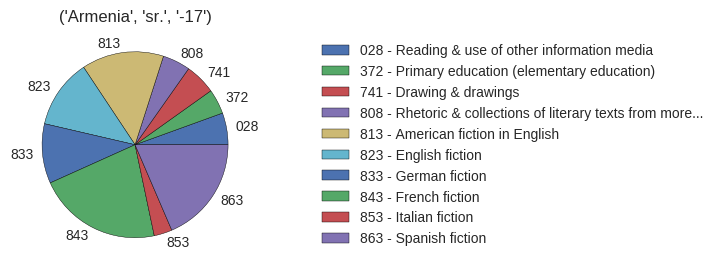

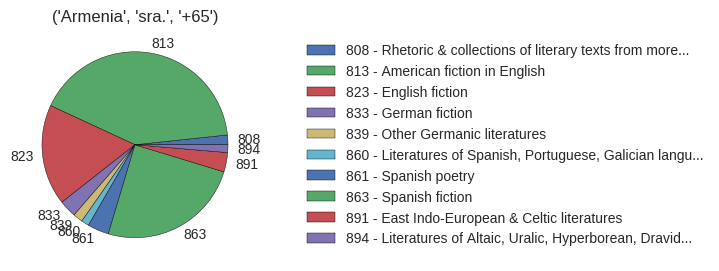

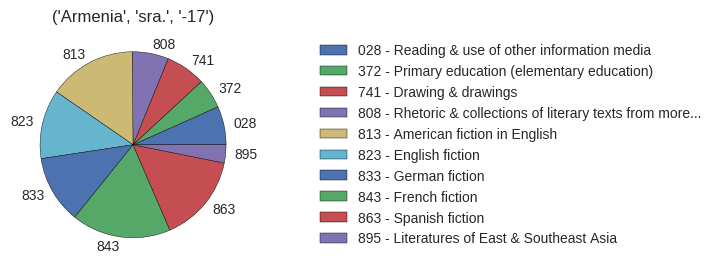

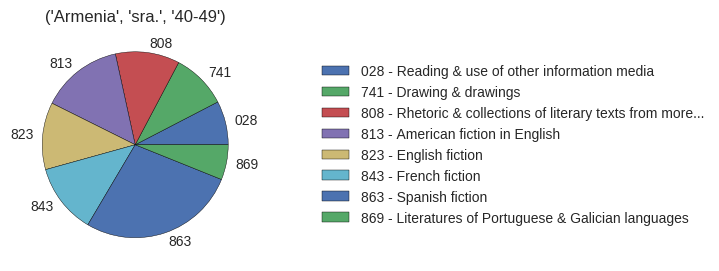

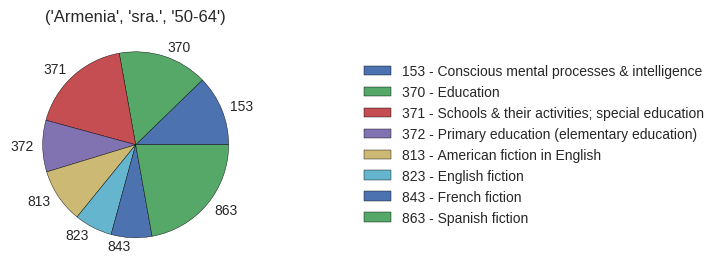

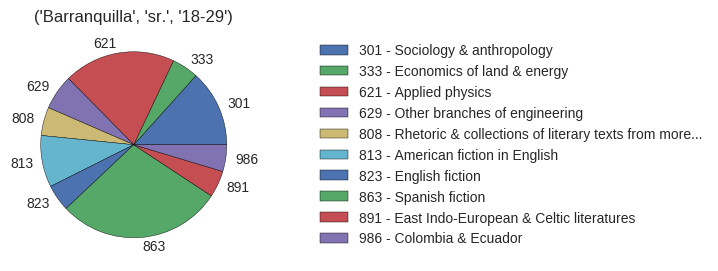

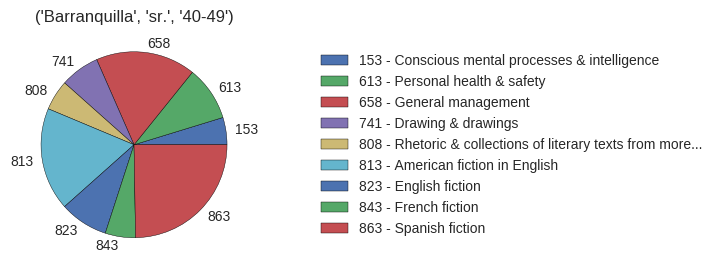

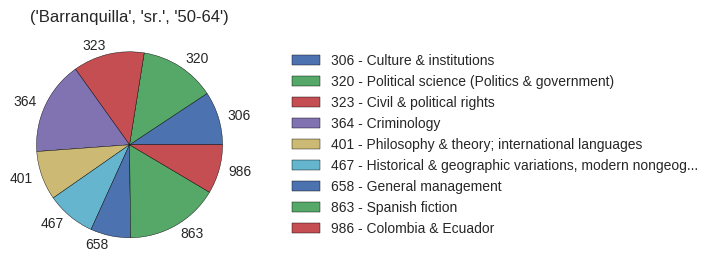

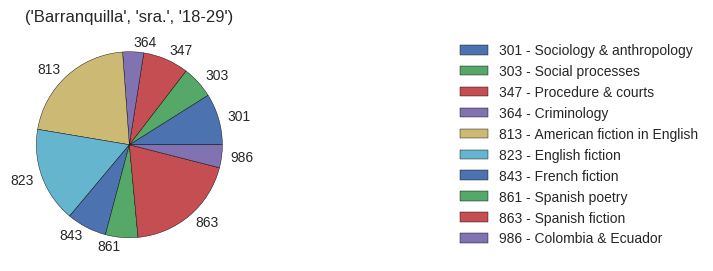

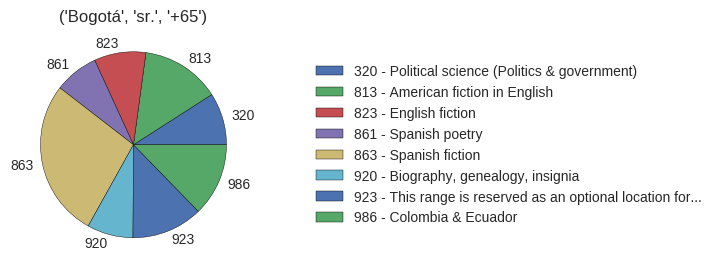

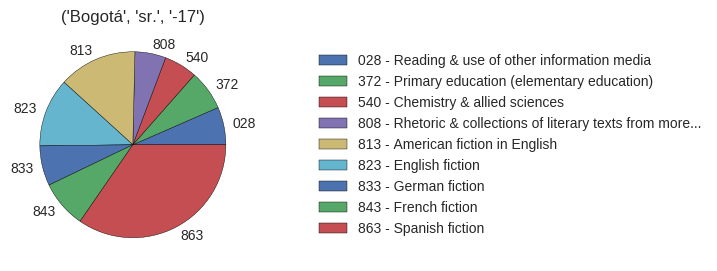

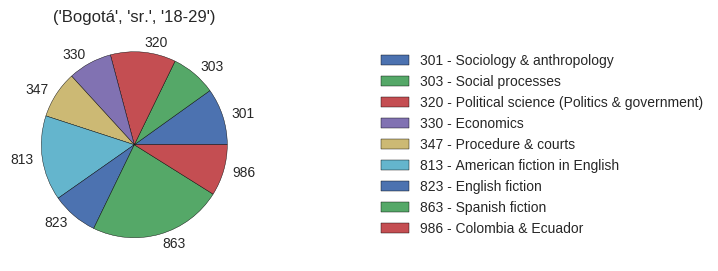

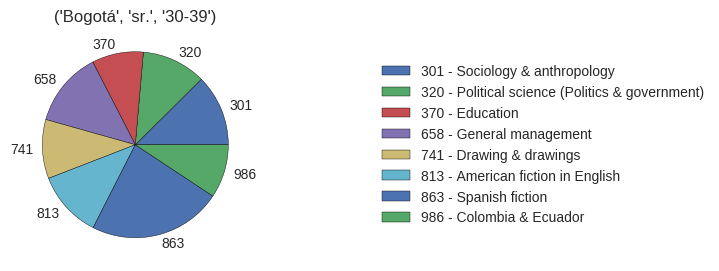

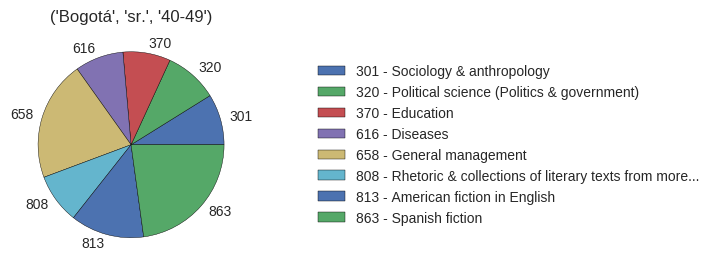

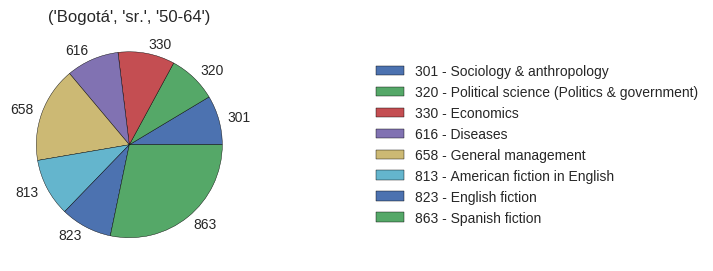

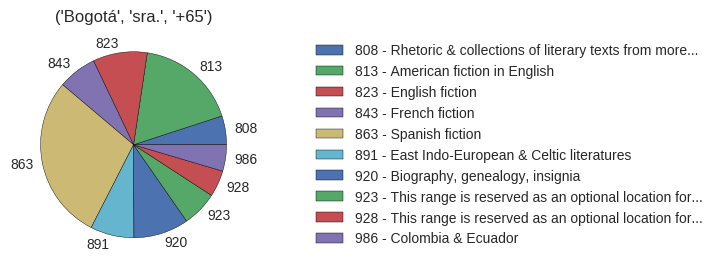

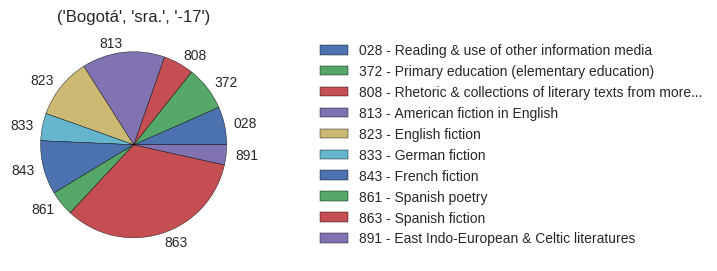

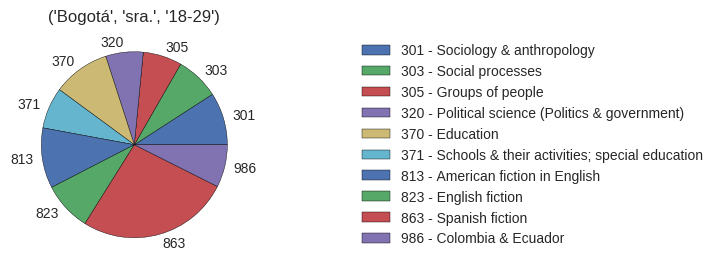

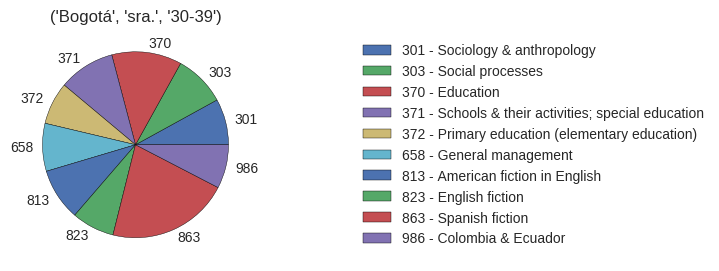

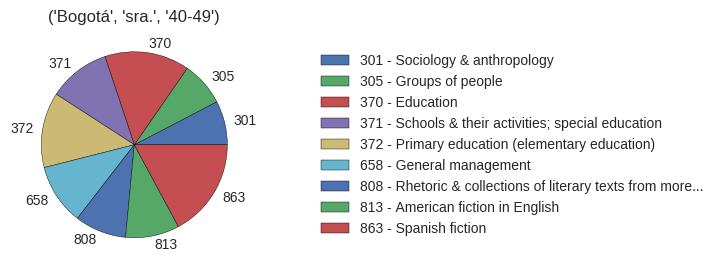

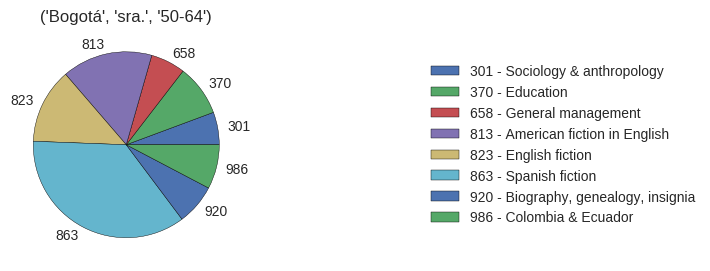

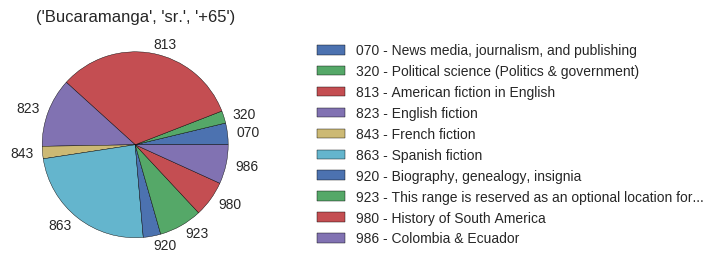

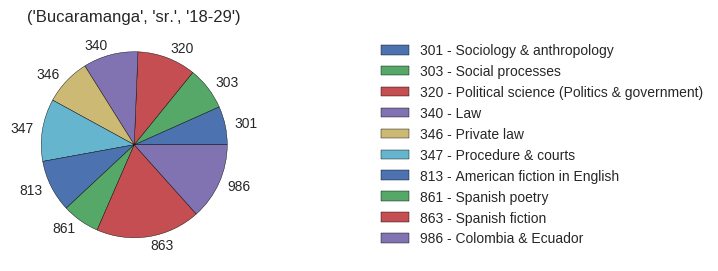

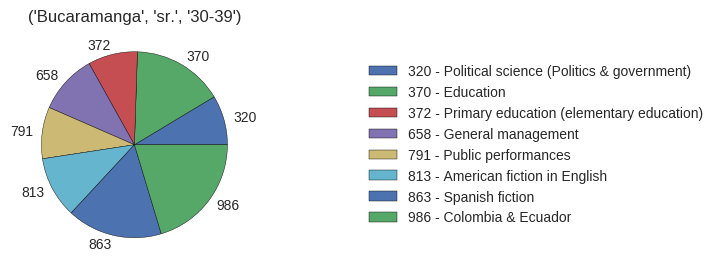

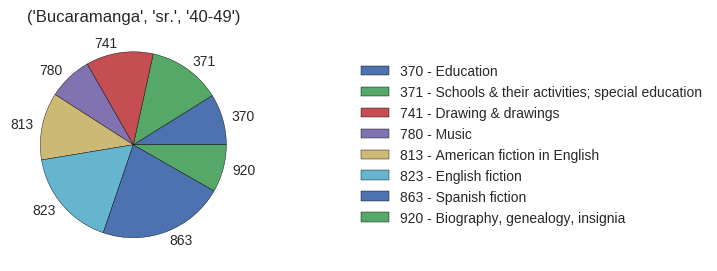

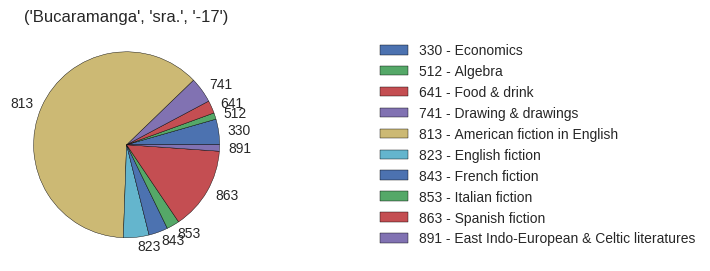

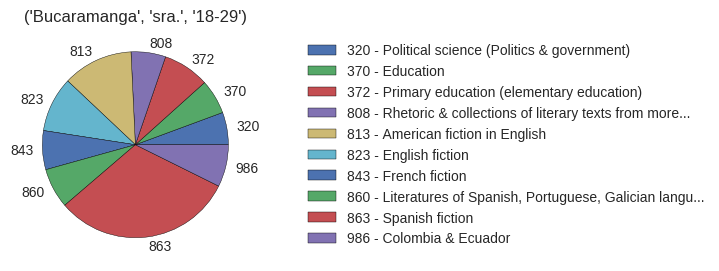

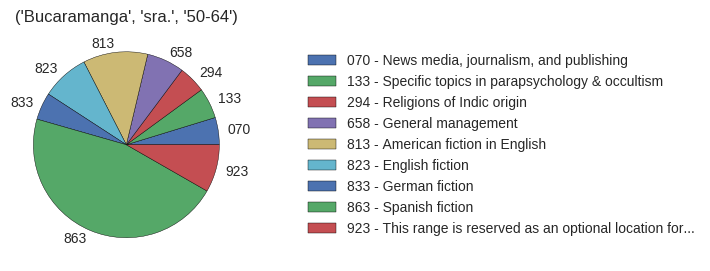

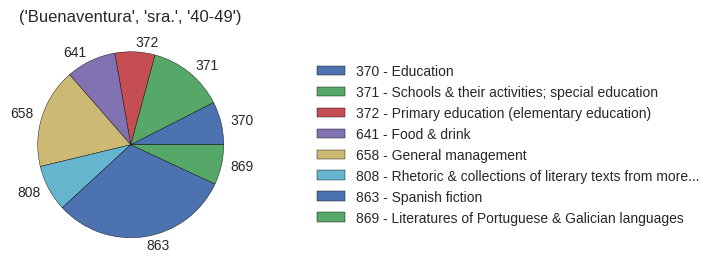

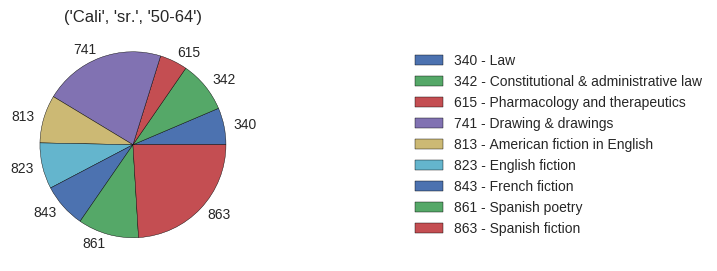

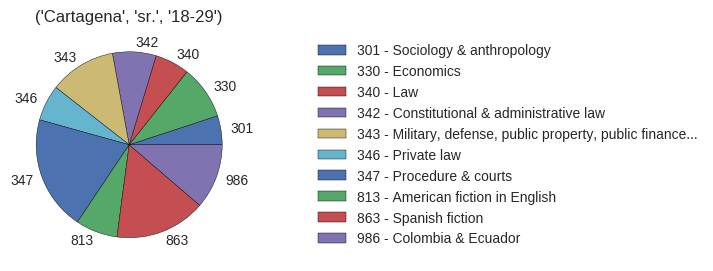

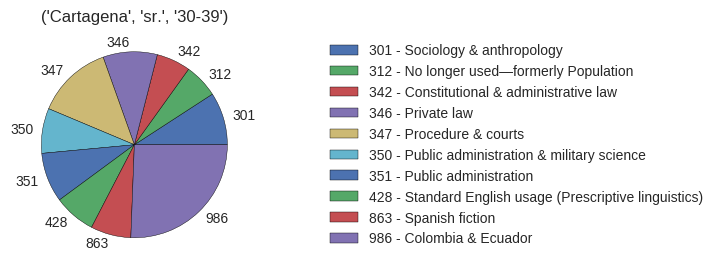

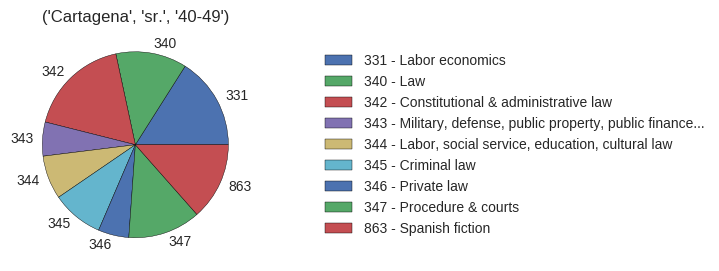

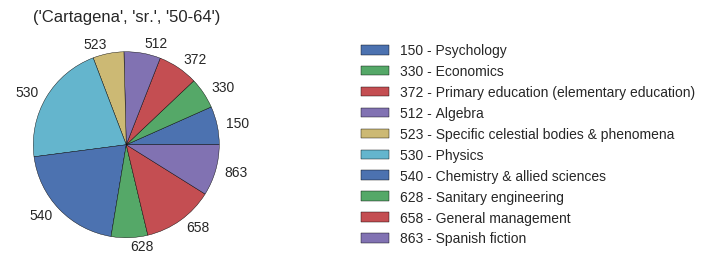

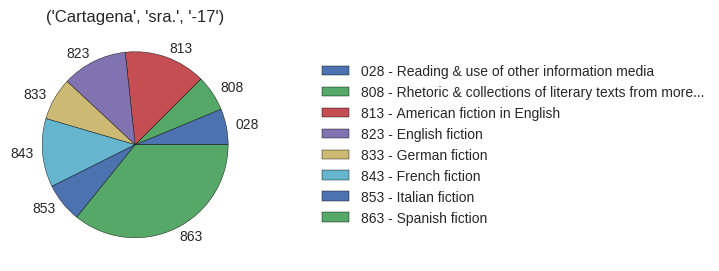

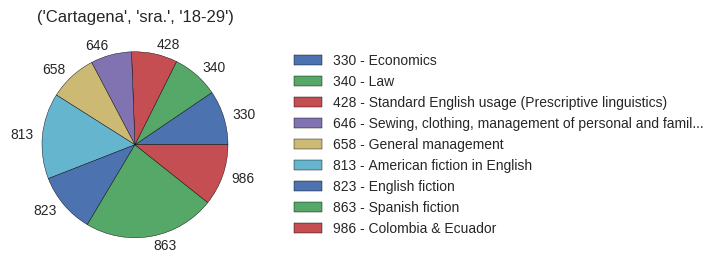

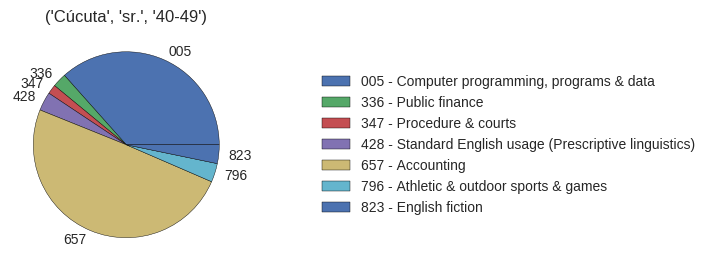

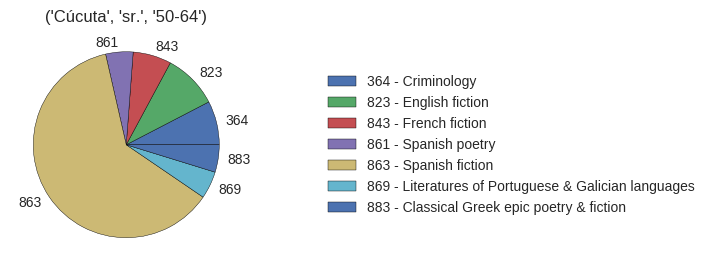

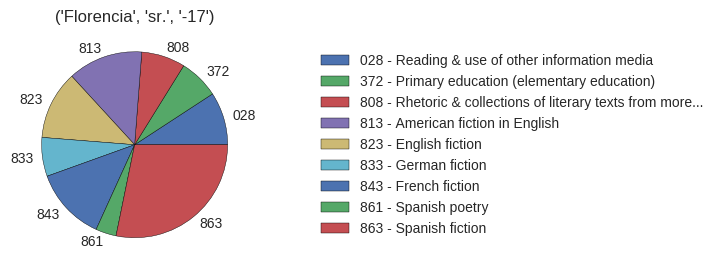

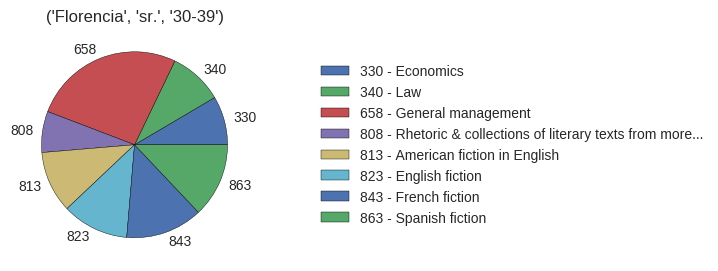

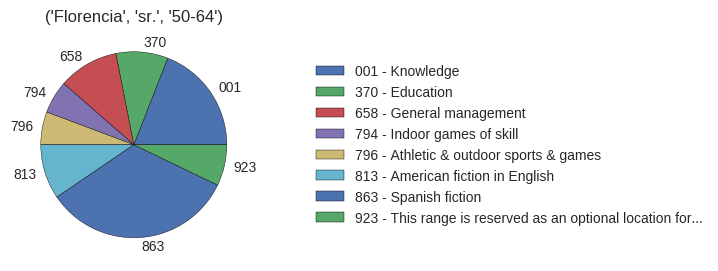

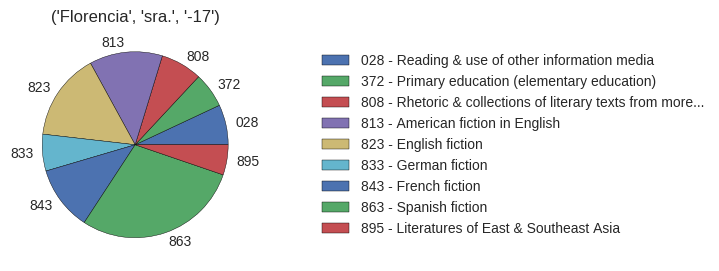

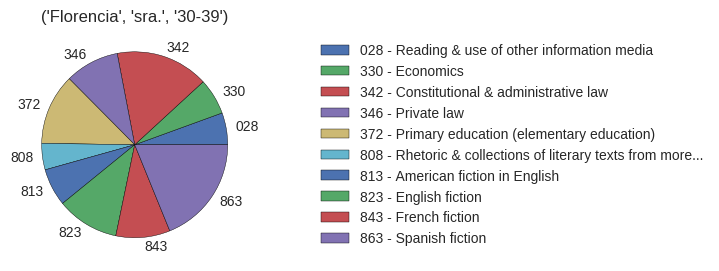

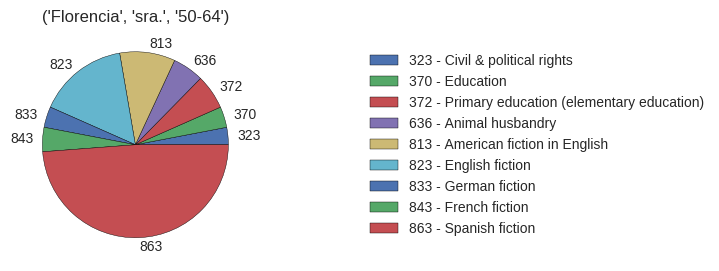

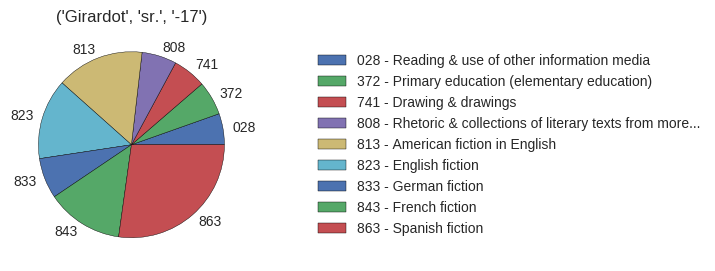

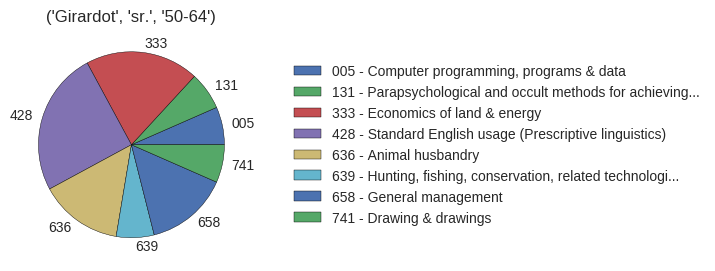

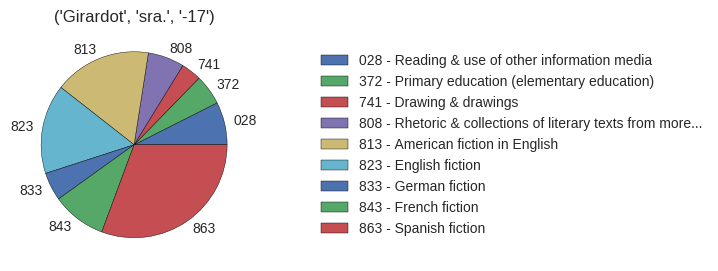

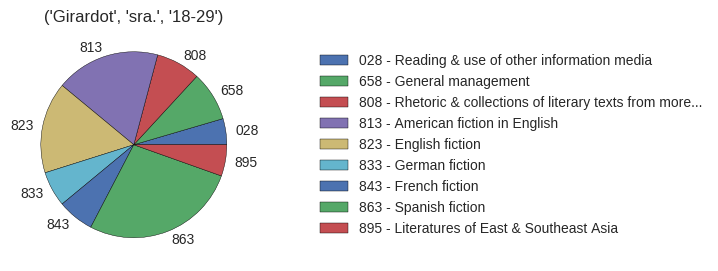

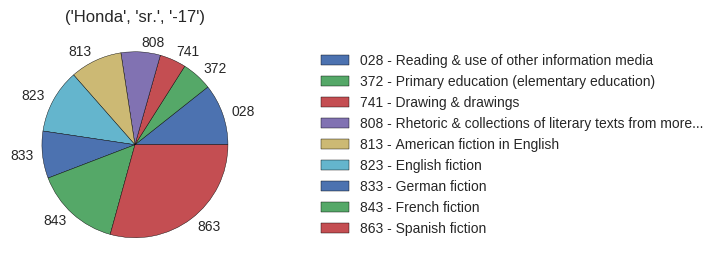

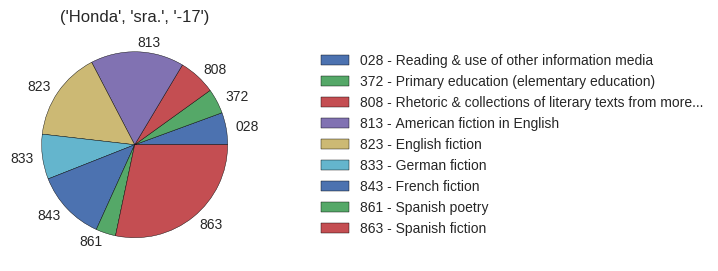

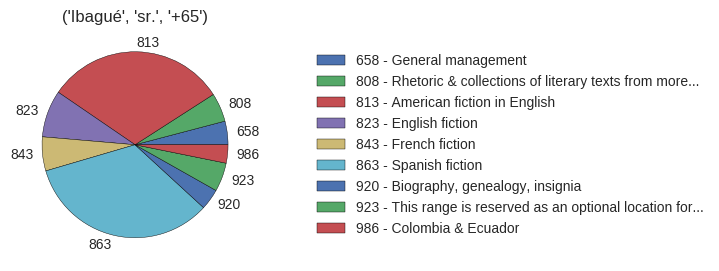

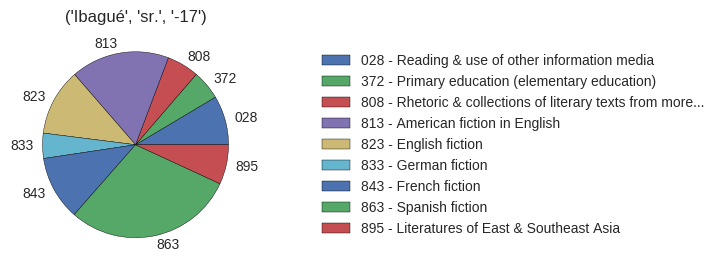

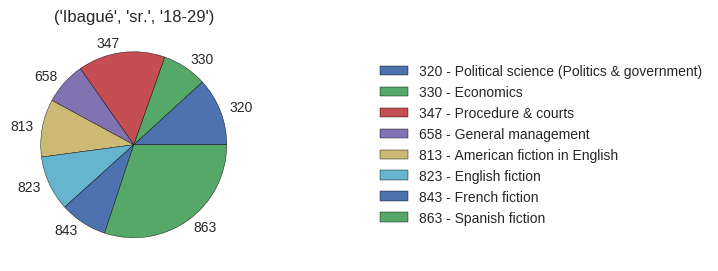

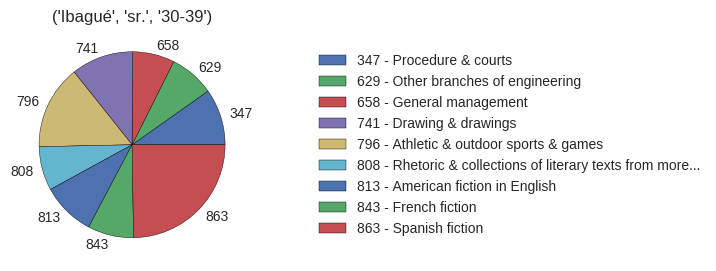

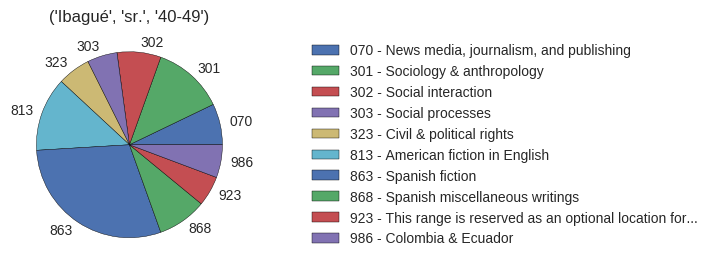

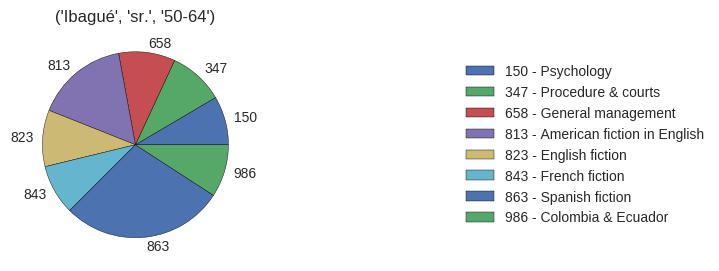

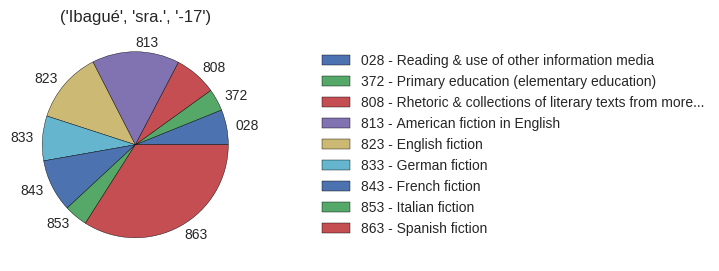

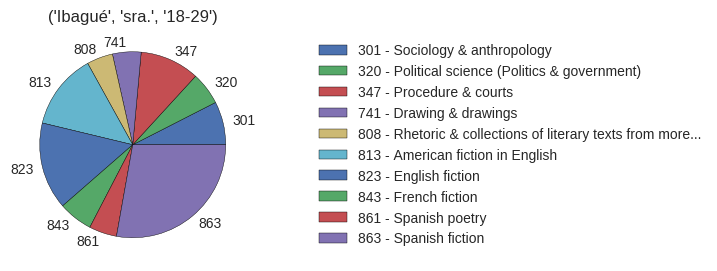

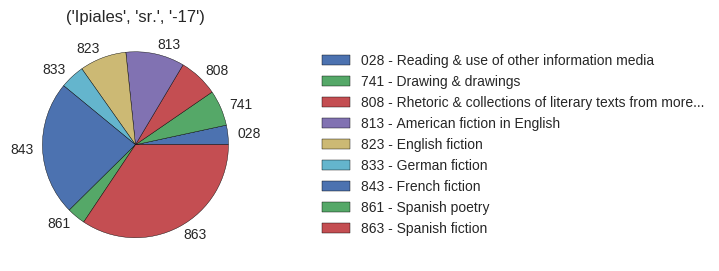

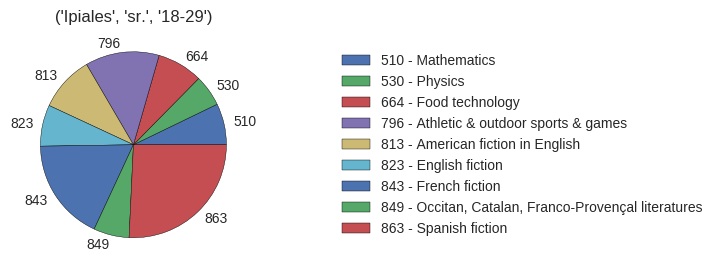

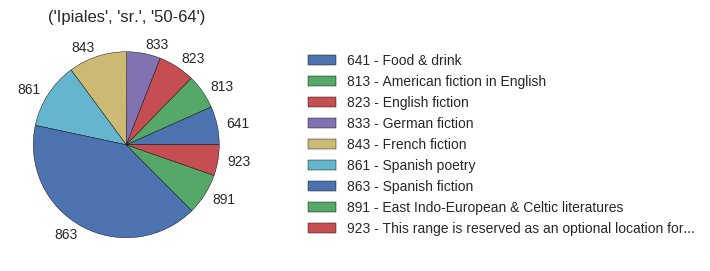

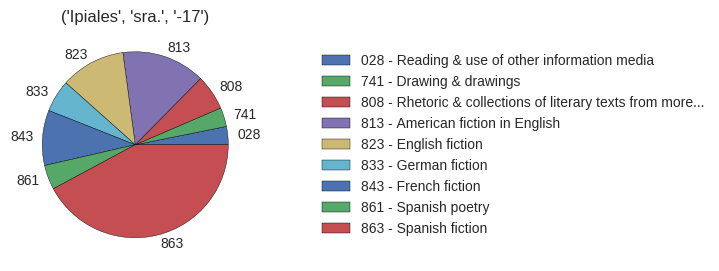

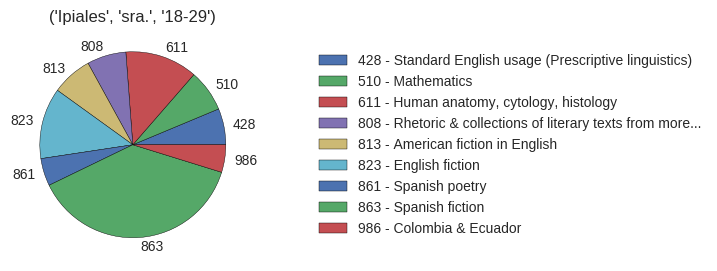

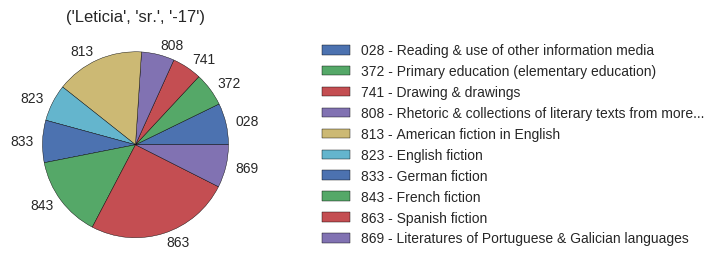

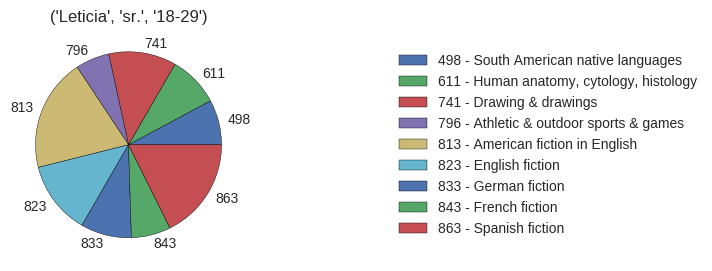

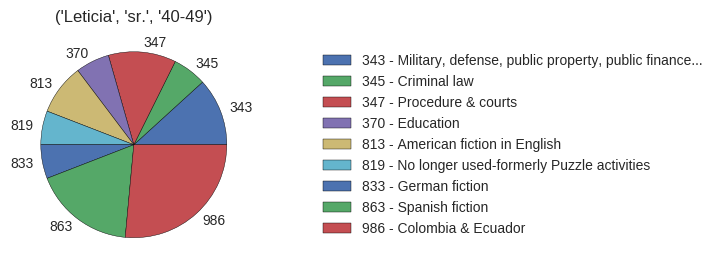

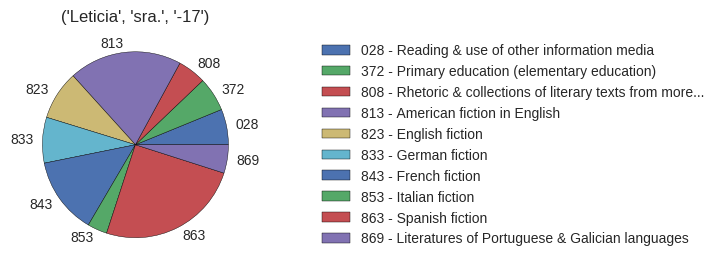

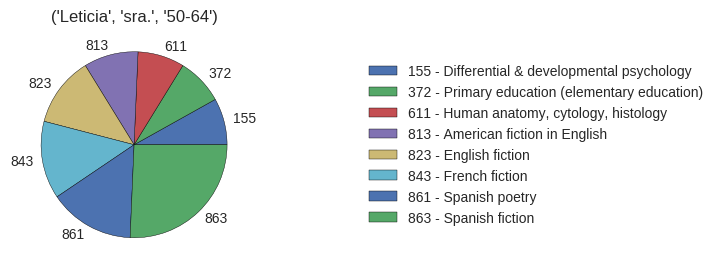

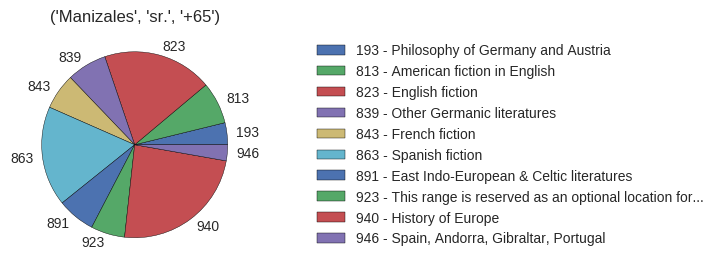

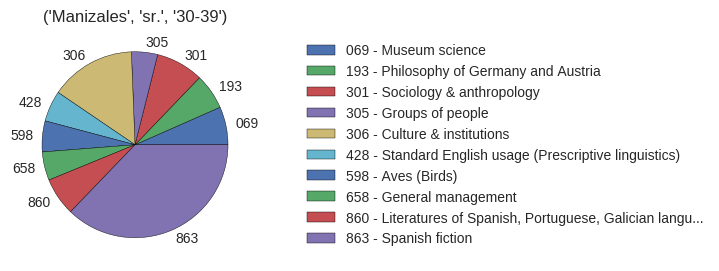

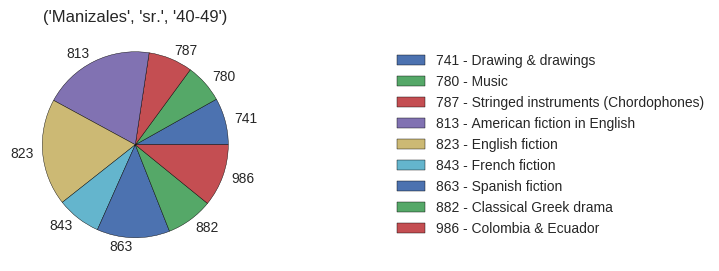

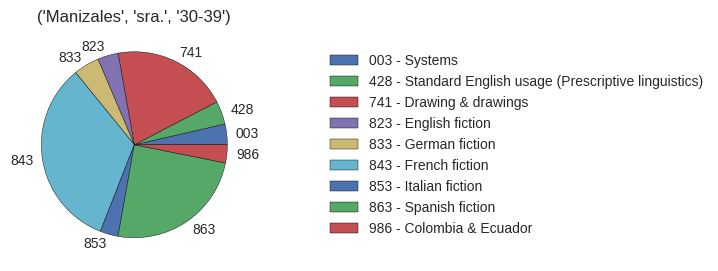

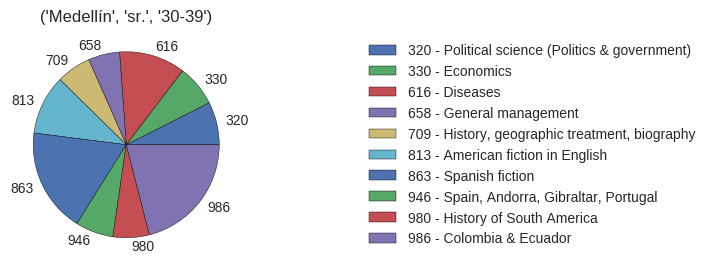

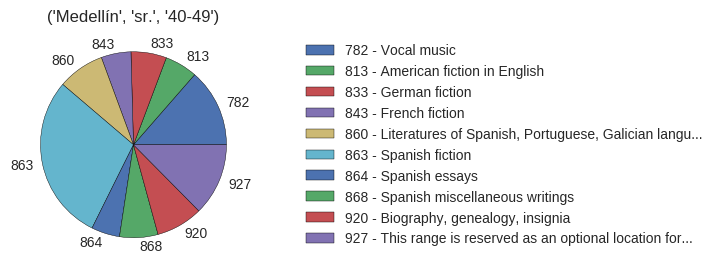

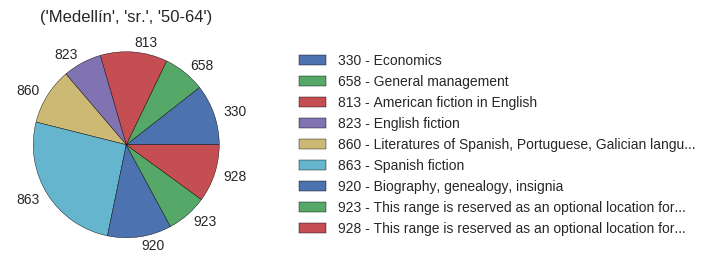

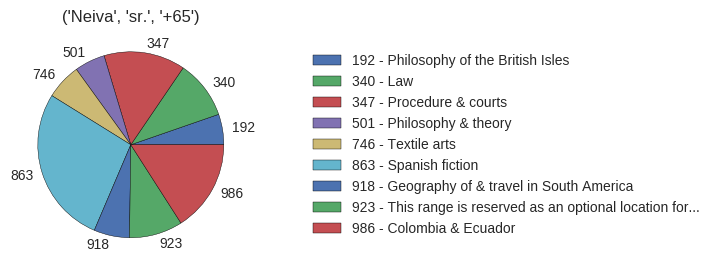

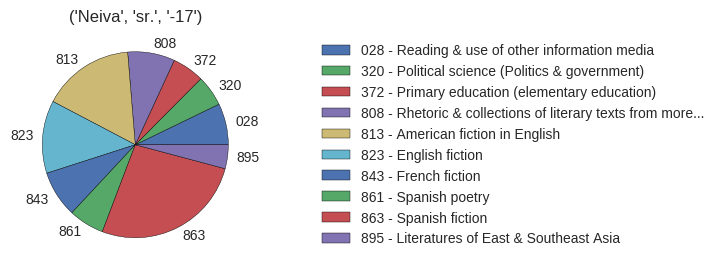

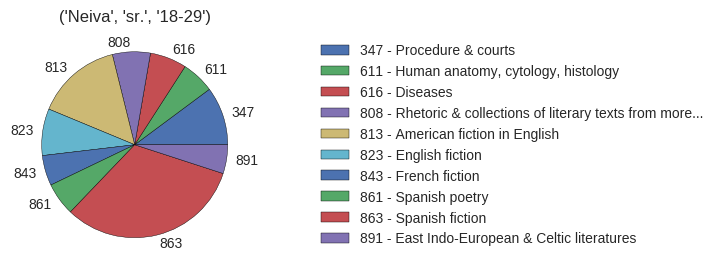

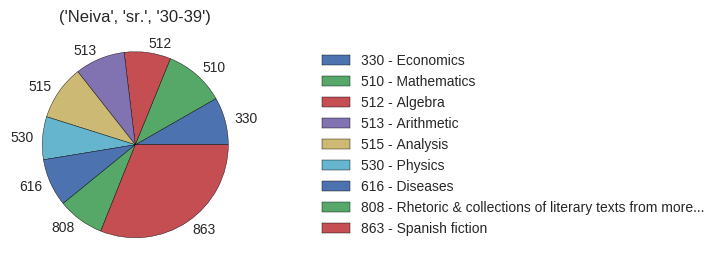

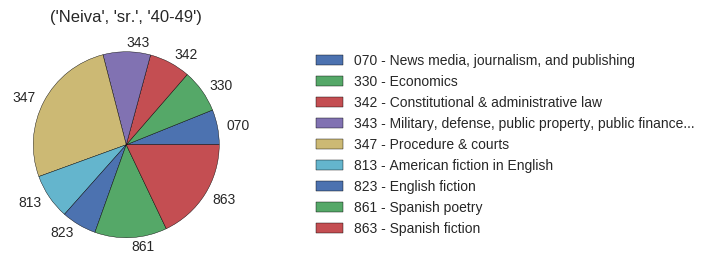

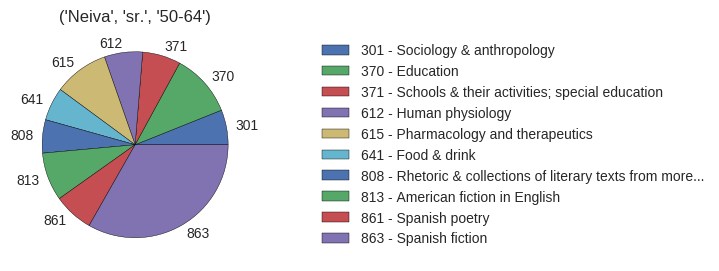

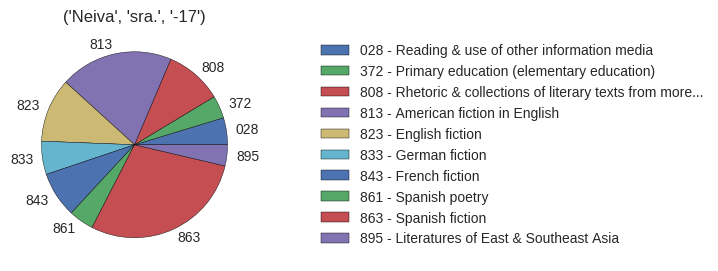

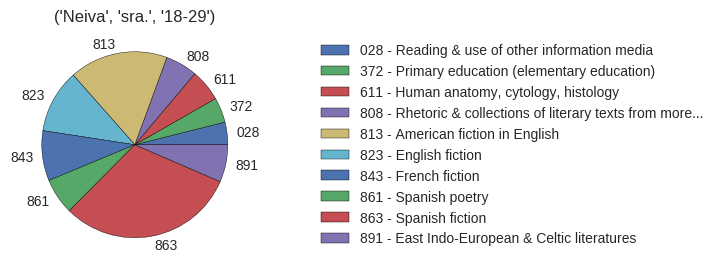

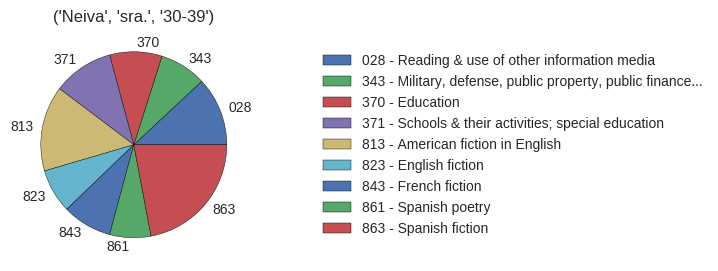

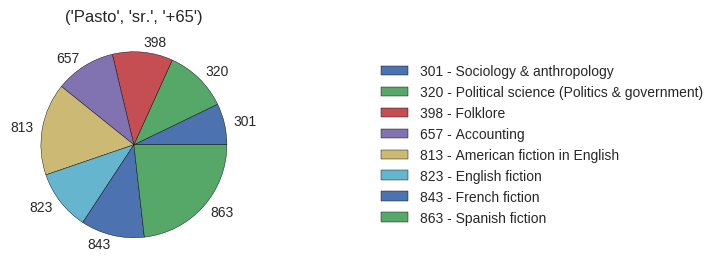

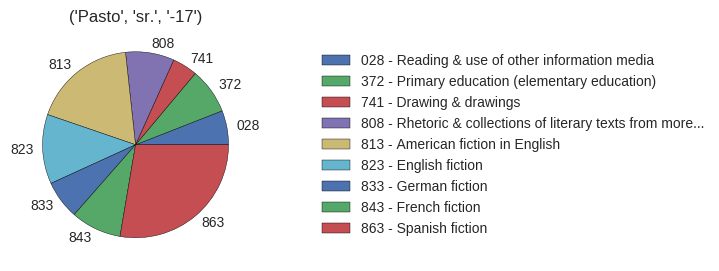

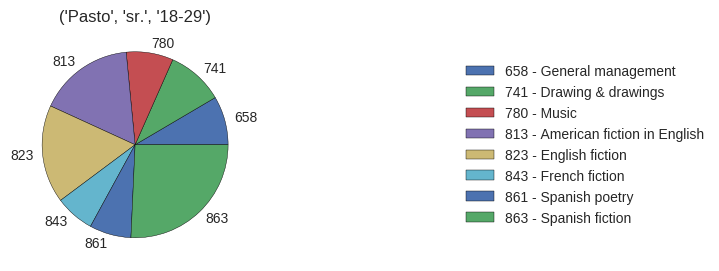

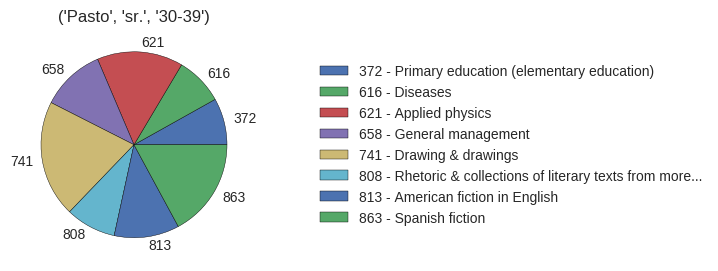

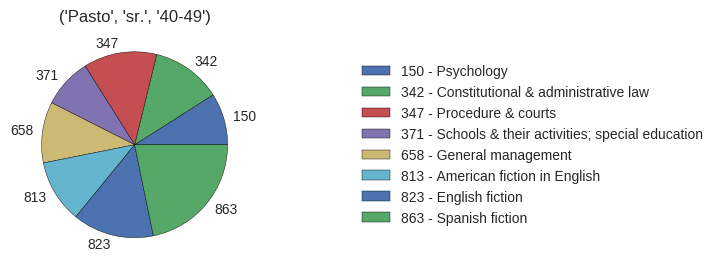

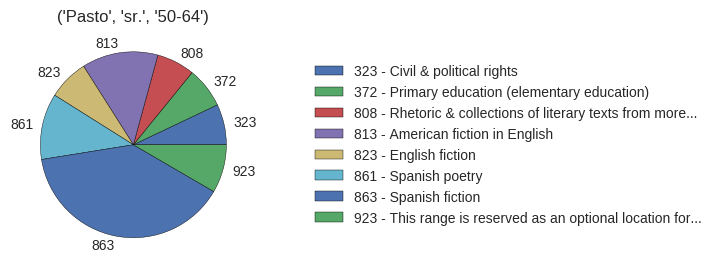

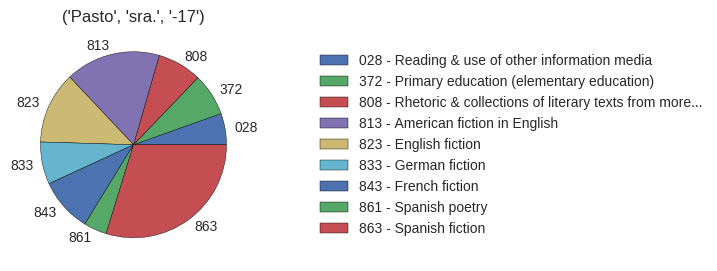

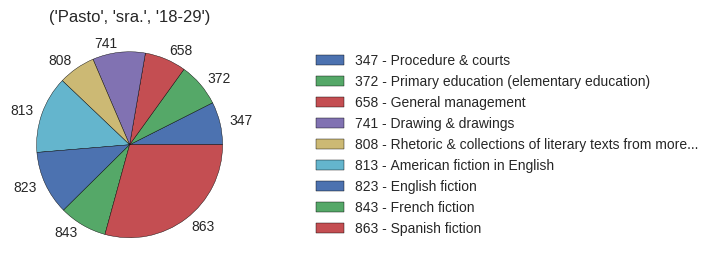

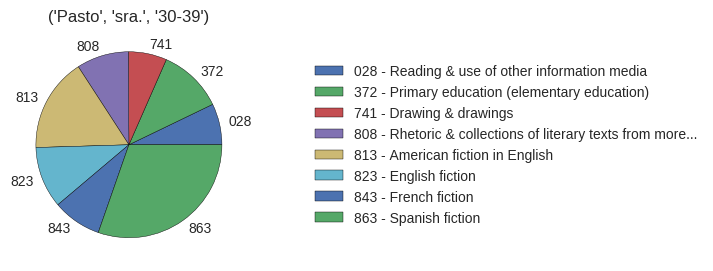

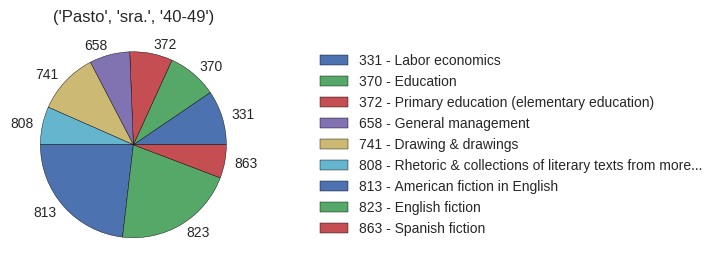

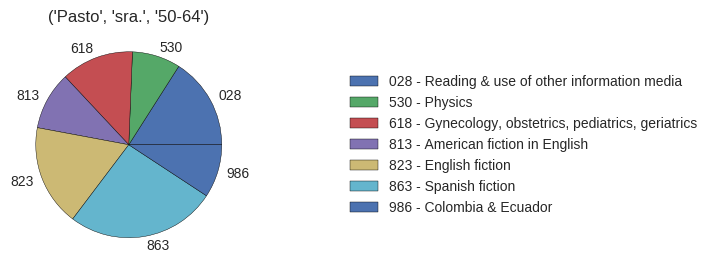

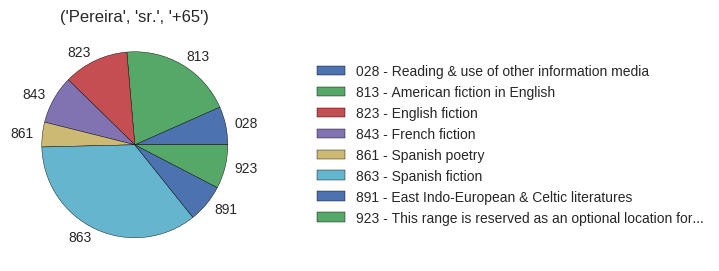

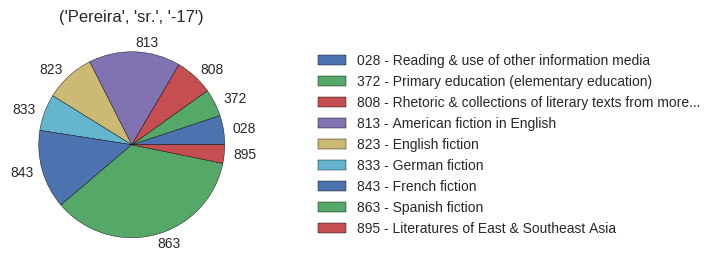

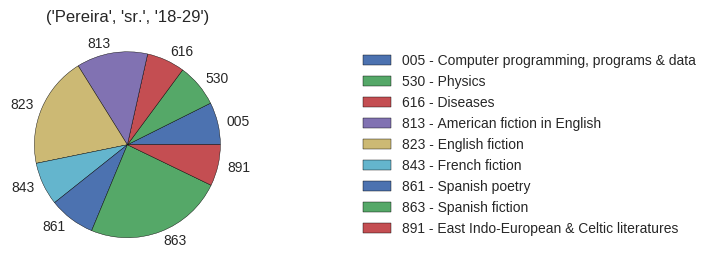

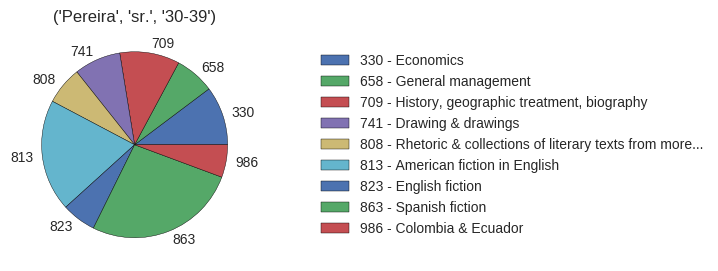

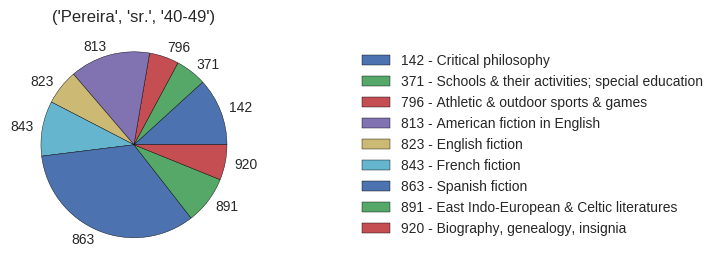

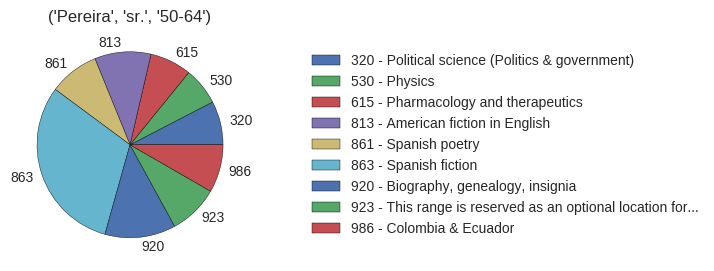

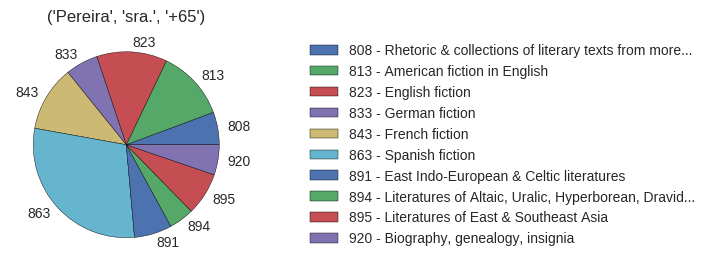

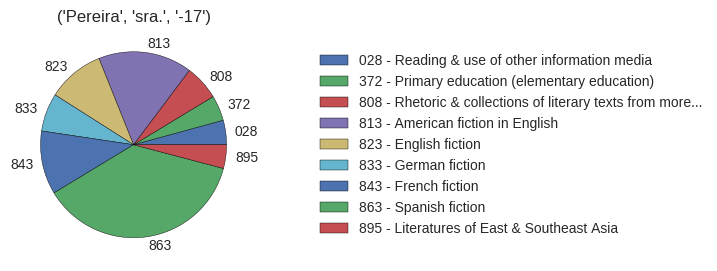

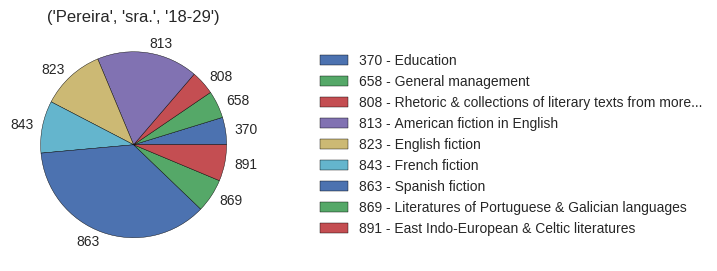

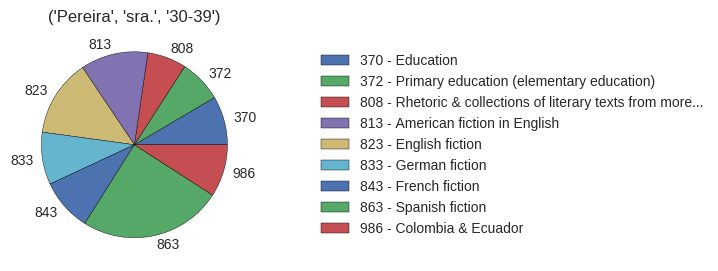

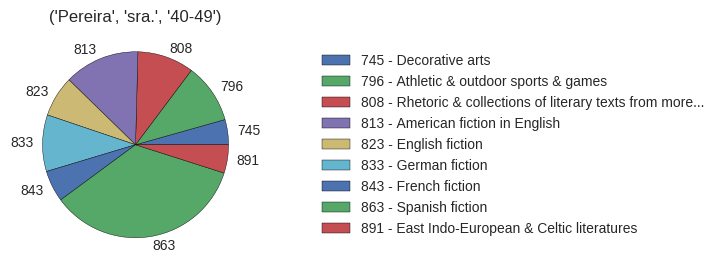

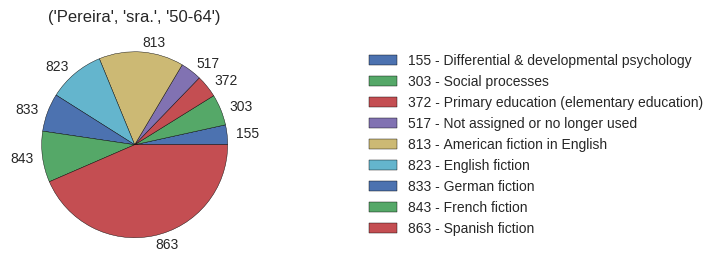

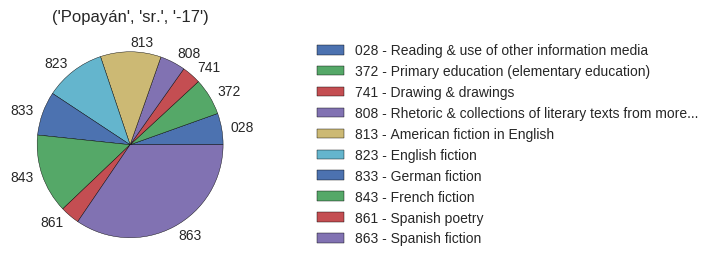

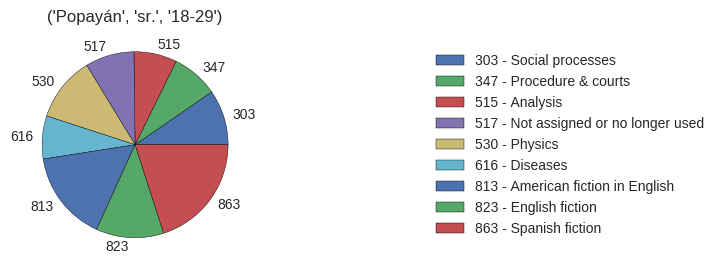

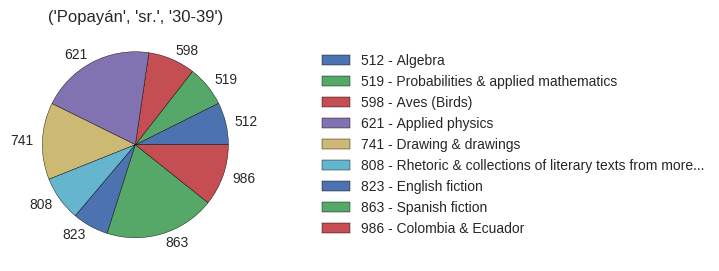

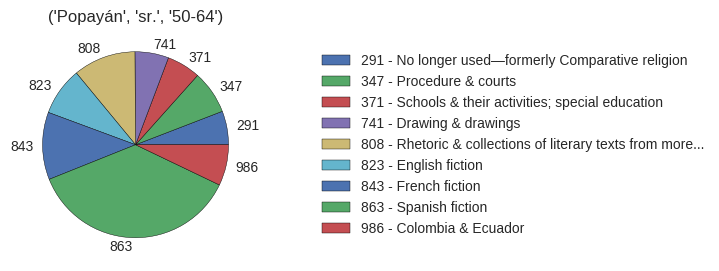

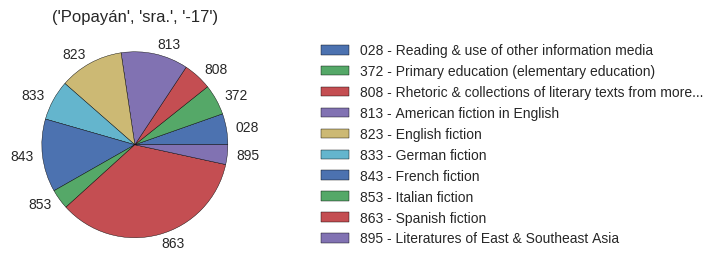

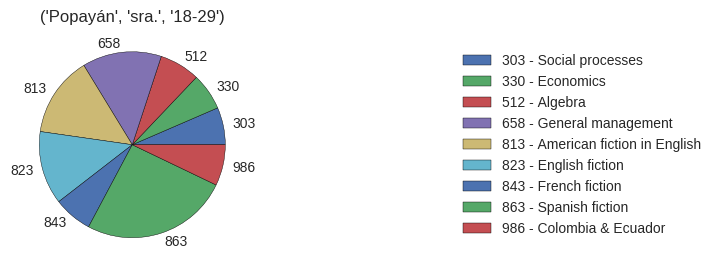

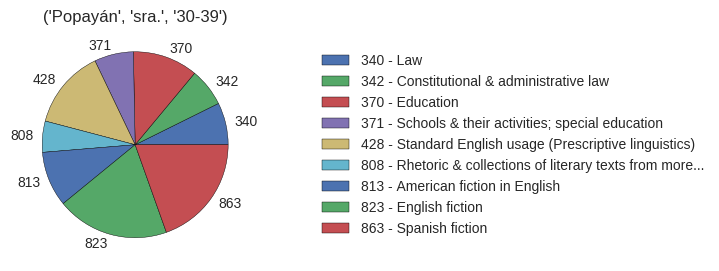

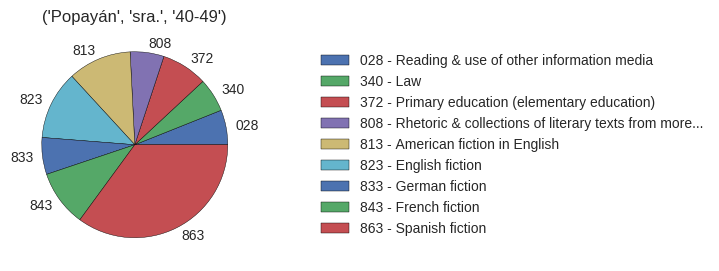

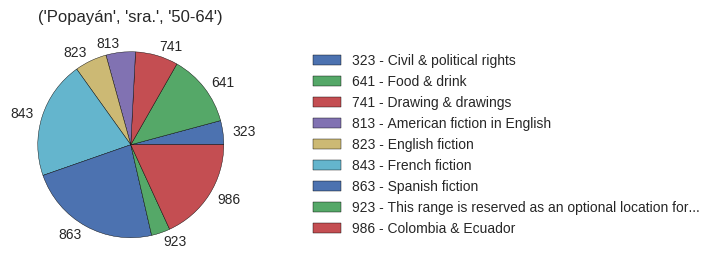

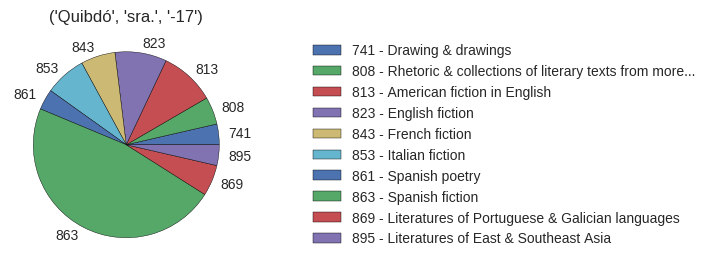

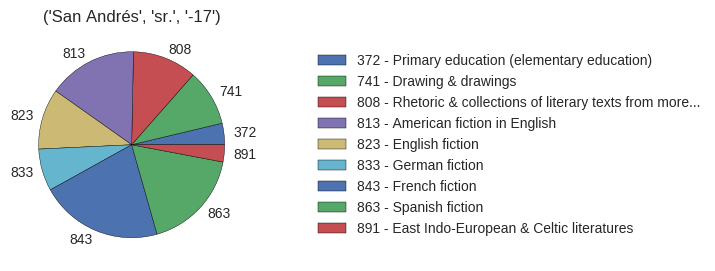

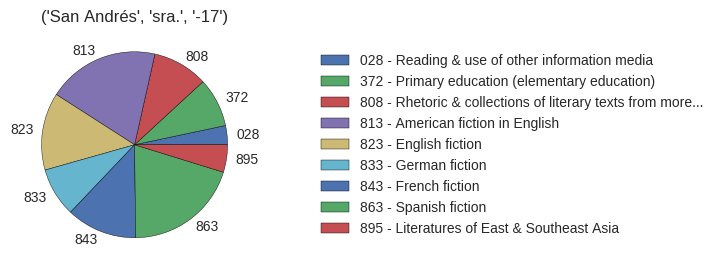

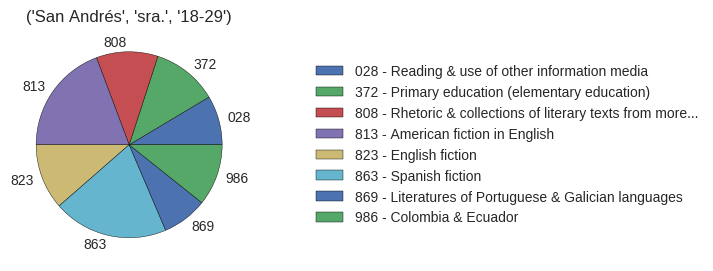

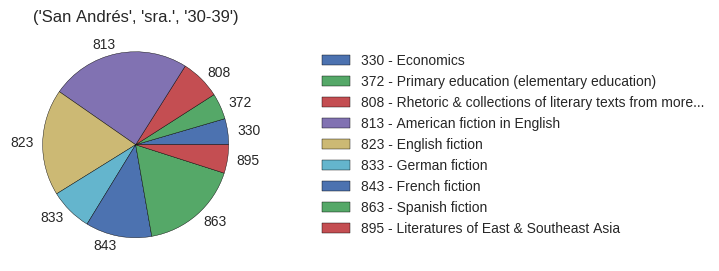

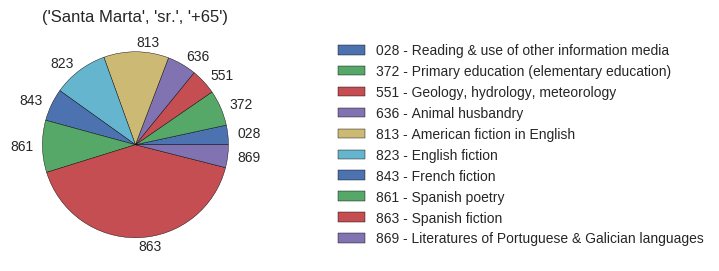

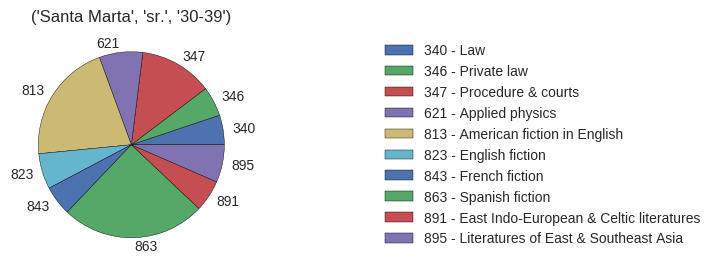

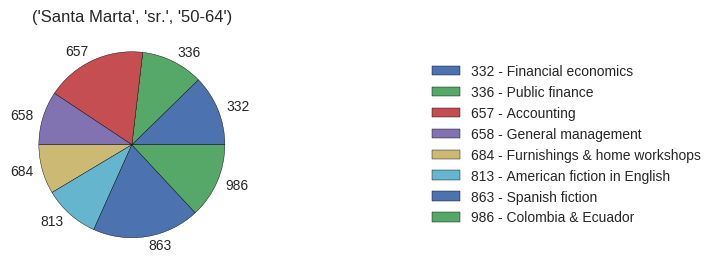

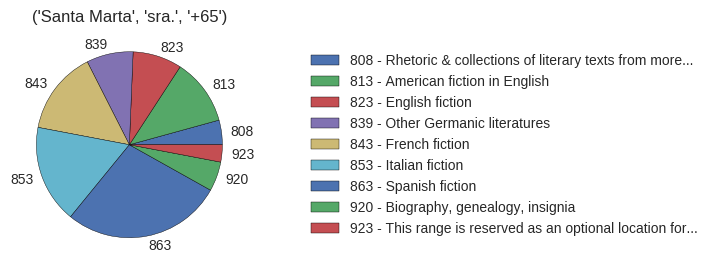

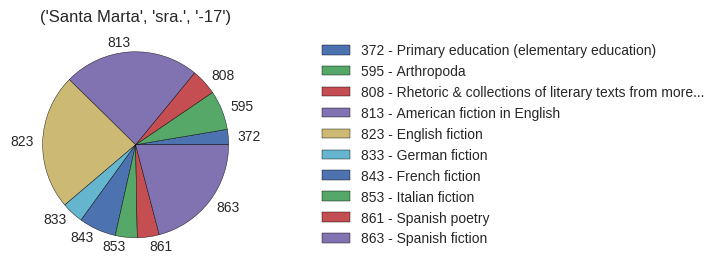

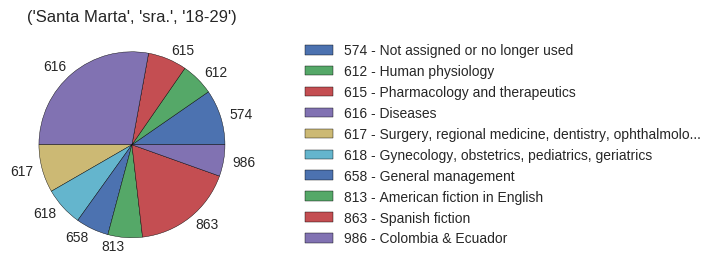

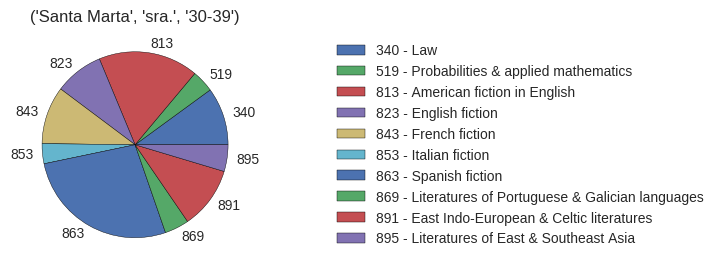

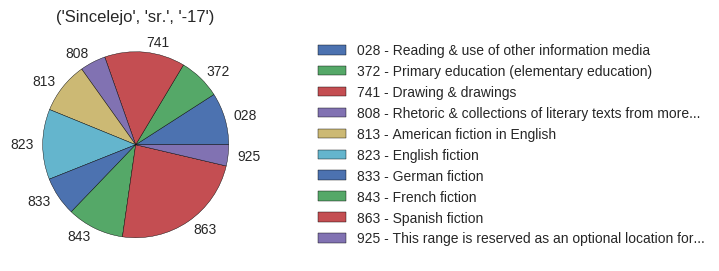

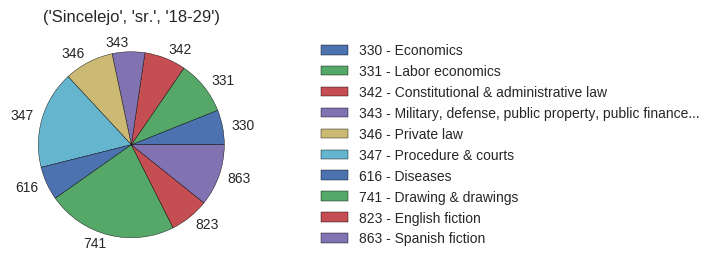

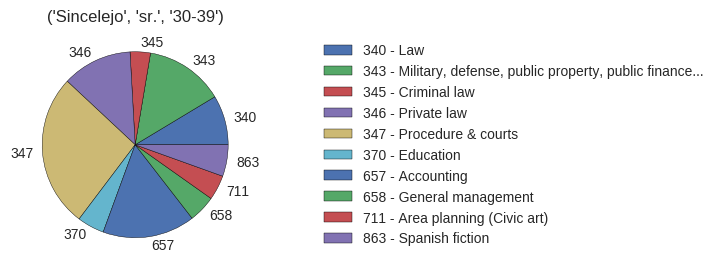

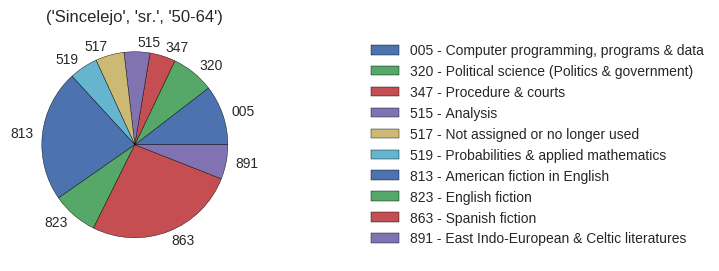

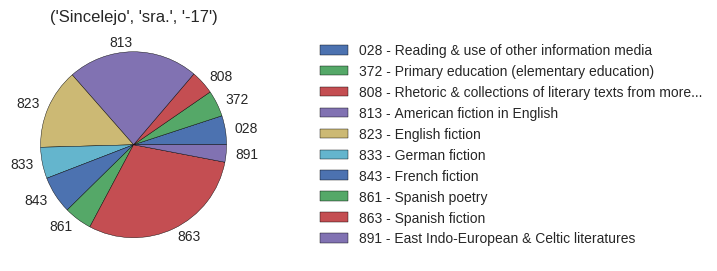

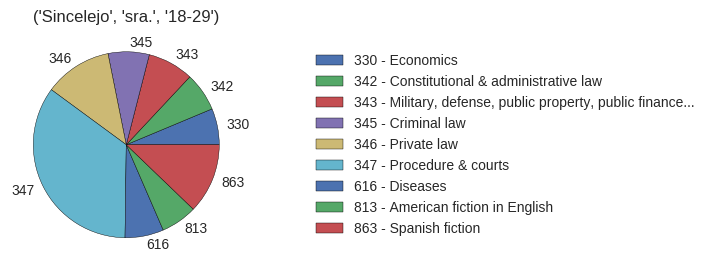

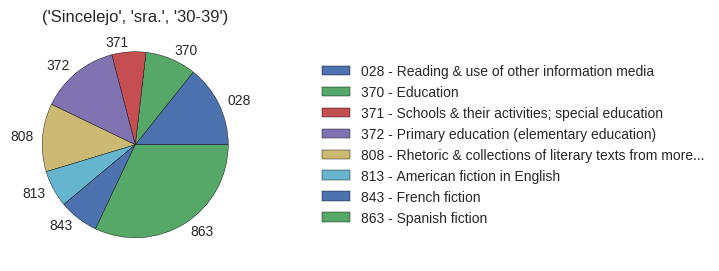

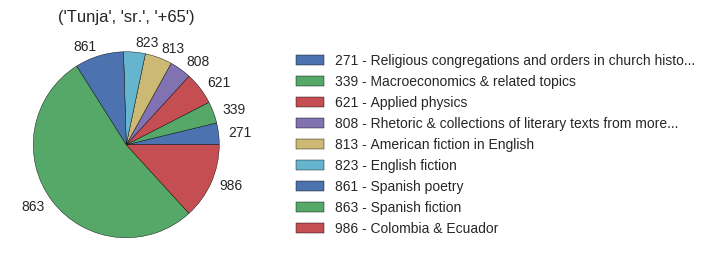

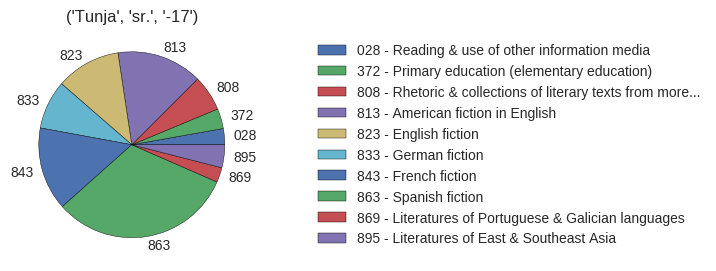

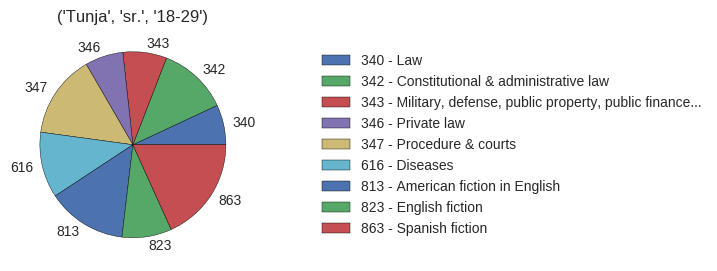

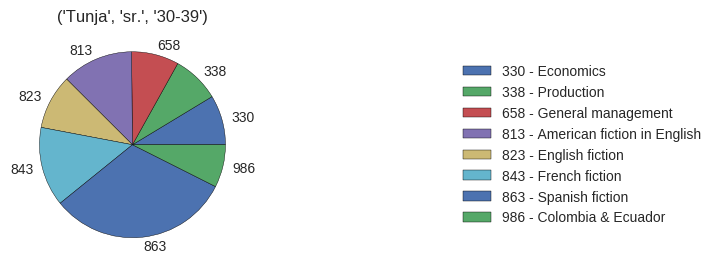

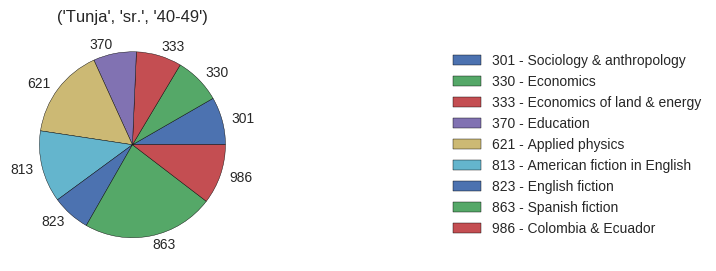

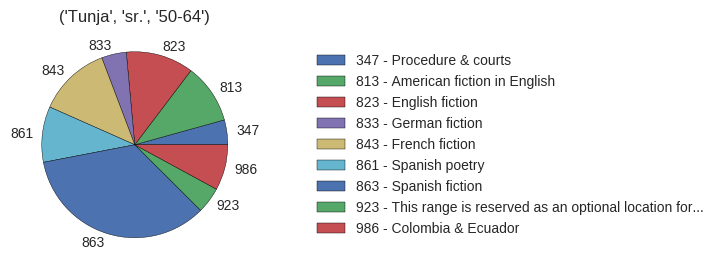

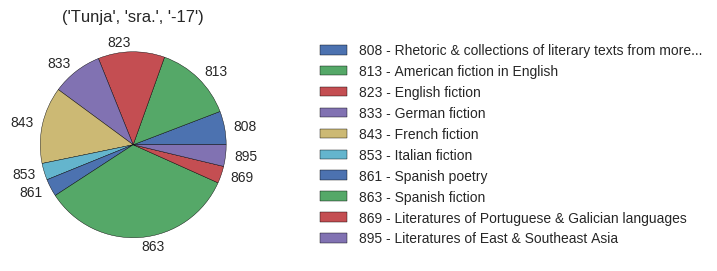

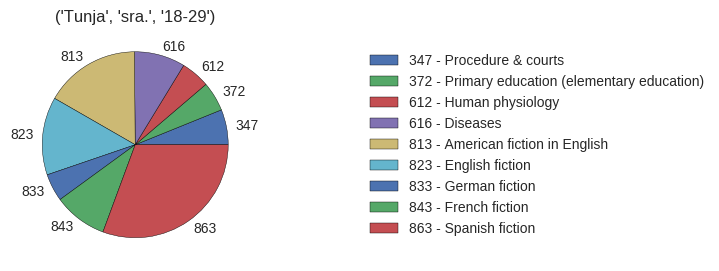

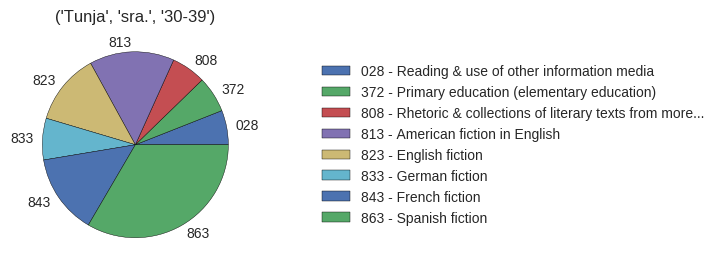

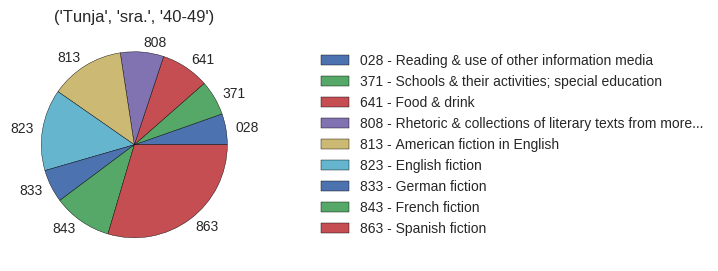

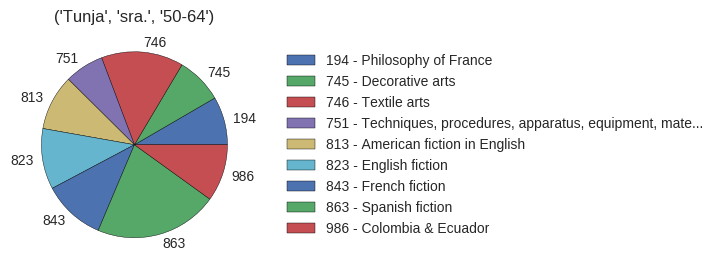

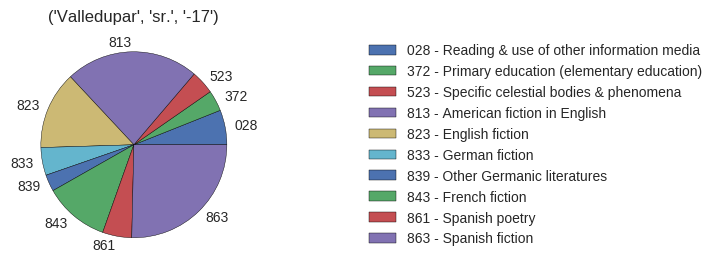

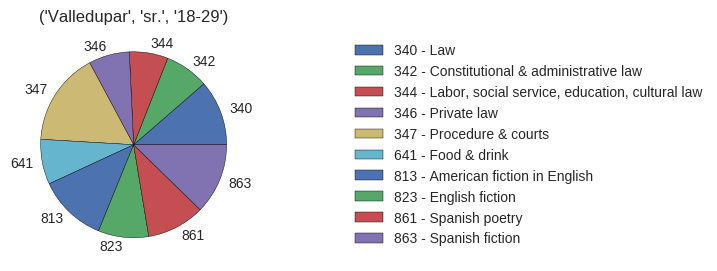

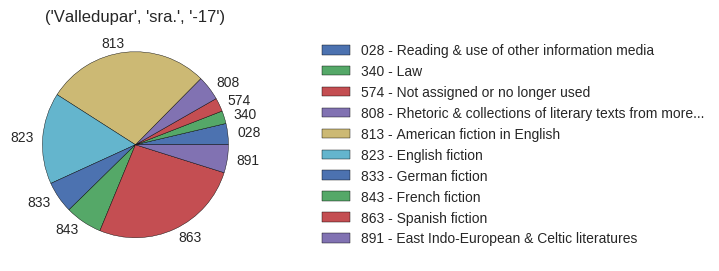

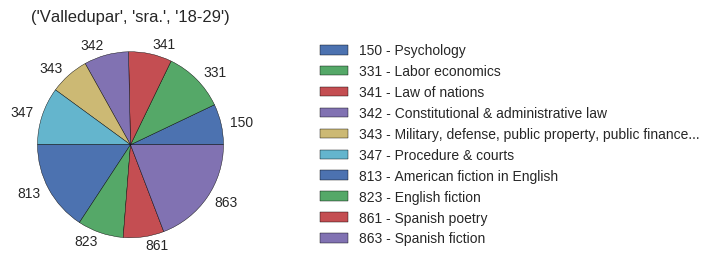

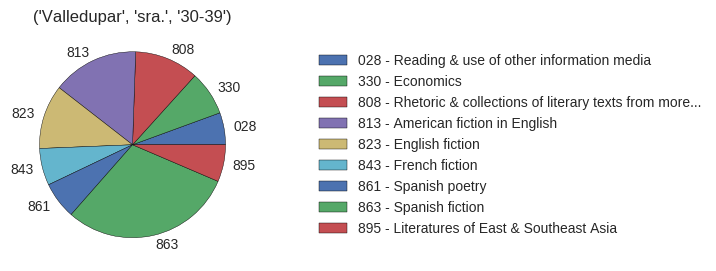

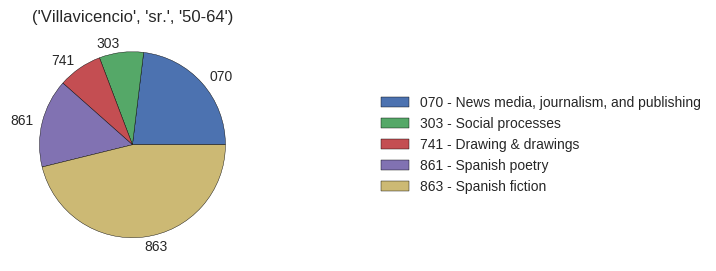

In [34]:
ciudades = selected_dewey_count_sr.index.levels[0]

for ciudad in ciudades:
#     plt.figure()
    sr = selected_dewey_count_sr[ciudad]
    for i, subsr in sr.groupby(level=['Tratamiento', 'Rango_edad']):
        main_dict = defaultdict(int)
        sub_dict = defaultdict(int)
        cat_dict = defaultdict(int)
        for j, x in subsr.iteritems():
            try:
                n = int(j[2])
                cat_dict[j[2]] += x
                sub_dict[j[2][:2] + '-'] += x
                main_dict[j[2][:1] + '--'] += x
            except:
                pass
        
        plt.figure()
        ax = pd.Series(cat_dict).plot(
            kind='pie',
            figsize=(3, 3),
#             rot=60,
            title=str((ciudad, ) + i),
        )
        ax.set_ylabel('')
        lines, labels = ax.get_legend_handles_labels()
        ax.legend(
            lines,
            [x + ' - ' + (dewey_dict[x] if len(dewey_dict[x]) < 50 else dewey_dict[x][:50] + '...') for x in labels],
            loc='center right', bbox_to_anchor=(3.0, 0.5),
        )